# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [23]:
! pip install Pillow

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [25]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [26]:
!ls MNIST

processed  raw


In [27]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [28]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

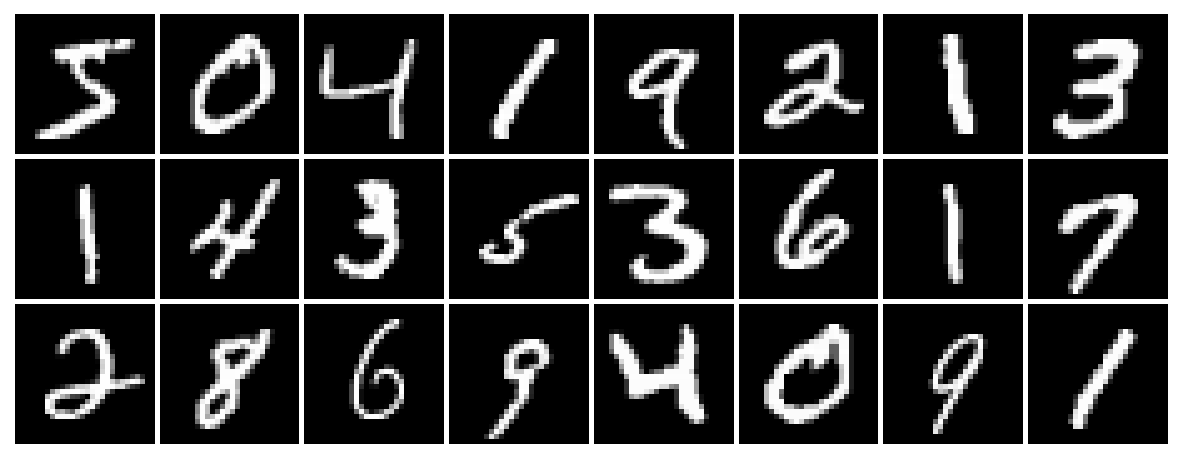

In [29]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


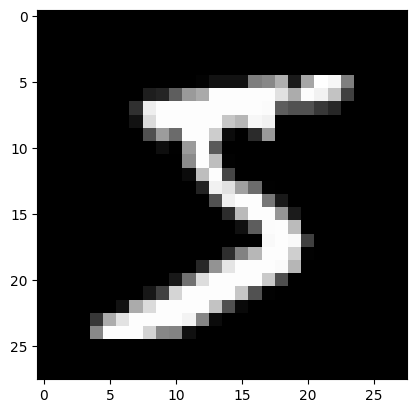

In [30]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [31]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [32]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 1.0983e-02,  1.1643e-01,  2.3063e-01,  1.2844e-01, -1.9098e-01,
          1.4121e-01,  2.7560e-02,  5.4398e-04,  1.3383e-01,  1.6343e-01],
        [-3.2525e-02,  4.4134e-02,  2.6577e-01, -3.2733e-01, -3.2880e-01,
         -3.8933e-04,  1.9008e-01, -1.5161e-01,  2.8603e-01,  1.3837e-01],
        [-9.8631e-02,  1.0739e-01,  8.0680e-02,  2.2631e-01, -3.0149e-01,
         -7.8950e-02,  7.3239e-02, -1.4714e-01, -1.7301e-02, -3.5994e-01],
        [-1.9111e-02, -4.3723e-02,  3.8147e-01,  5.6003e-02, -9.3074e-02,
         -3.0144e-01, -5.0563e-03, -6.3268e-02, -1.2411e-01, -1.2072e-01],
        [-5.1038e-03,  1.3635e-02,  1.9041e-01,  1.6937e-01, -1.4791e-01,
         -1.6604e-04, -3.8163e-02,  4.9810e-02, -7.2981e-02, -4.2102e-01]],
       grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [33]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [34]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-y9uh1fi_
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-y9uh1fi_
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done


In [35]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3065, grad_fn=<NllLossBackward0>)

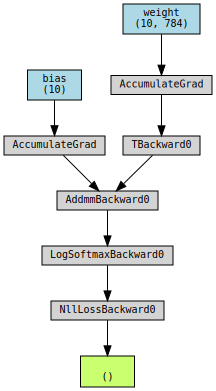

In [36]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Epoch[1/100], loss: 0.263637, acc: 0.942000


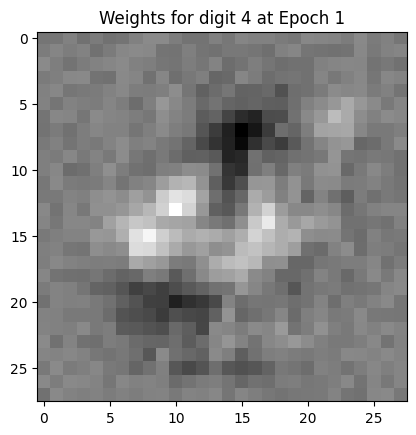

Epoch[2/100], loss: 0.262322, acc: 0.942000


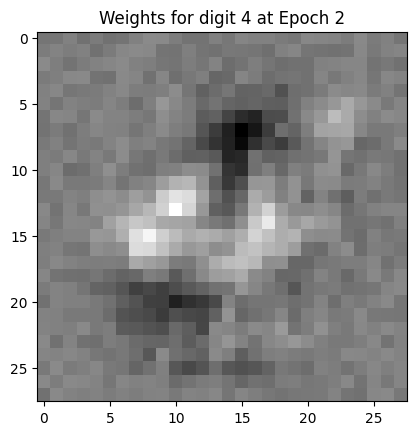

Epoch[3/100], loss: 0.261023, acc: 0.943000


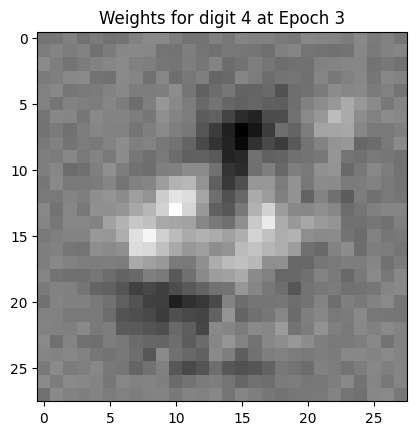

Epoch[4/100], loss: 0.259739, acc: 0.943000


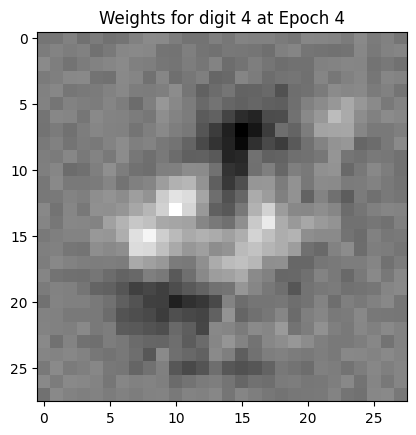

Epoch[5/100], loss: 0.258470, acc: 0.944000


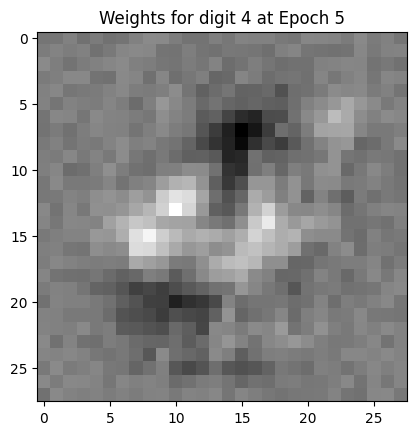

Epoch[6/100], loss: 0.257216, acc: 0.944000


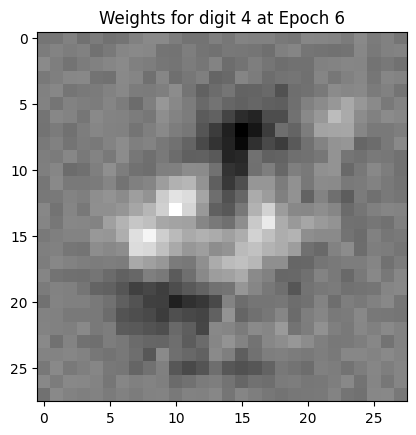

Epoch[7/100], loss: 0.255975, acc: 0.945000


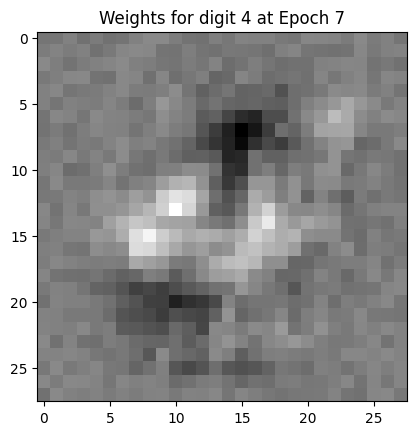

Epoch[8/100], loss: 0.254748, acc: 0.945000


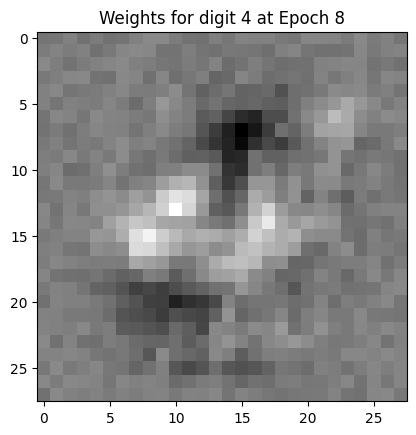

Epoch[9/100], loss: 0.253535, acc: 0.945000


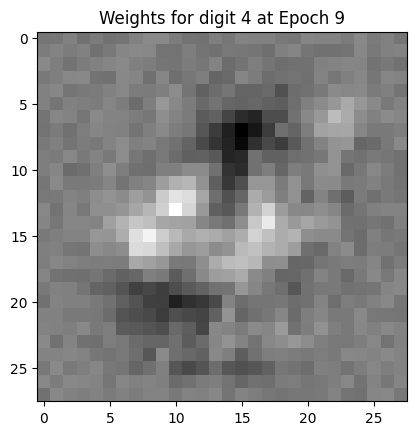

Epoch[10/100], loss: 0.252335, acc: 0.945000


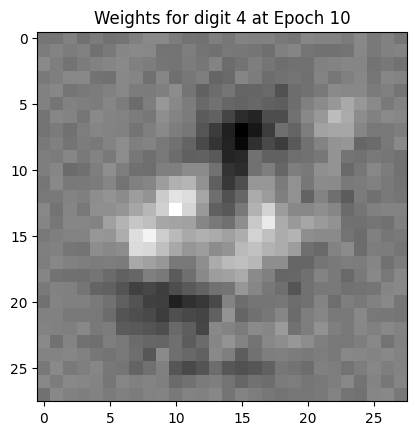

Epoch[11/100], loss: 0.251149, acc: 0.945000


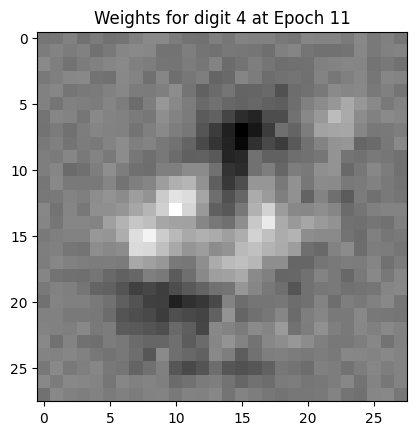

Epoch[12/100], loss: 0.249975, acc: 0.945000


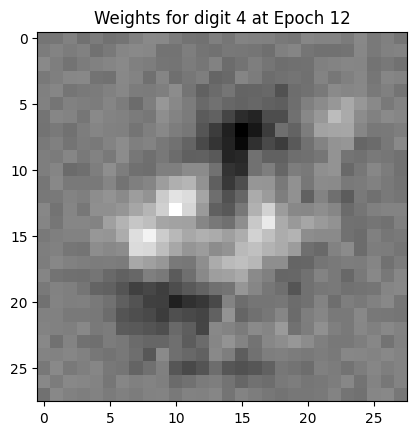

Epoch[13/100], loss: 0.248813, acc: 0.945000


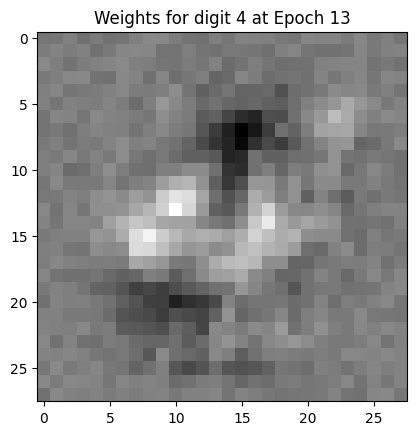

Epoch[14/100], loss: 0.247664, acc: 0.945000


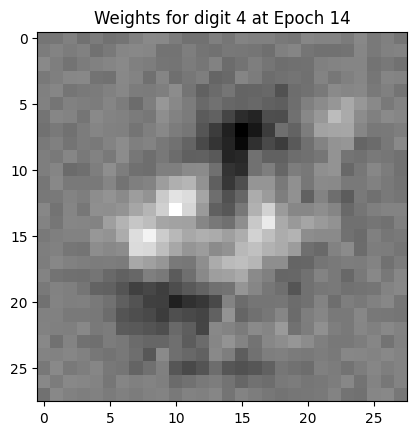

Epoch[15/100], loss: 0.246527, acc: 0.945000


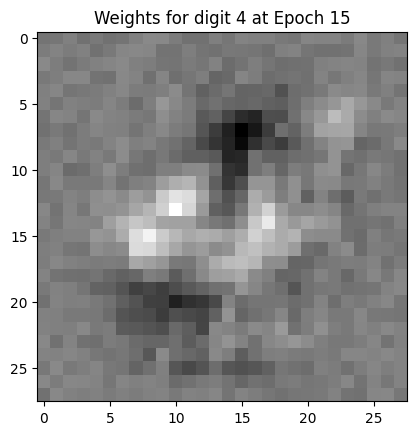

Epoch[16/100], loss: 0.245401, acc: 0.945000


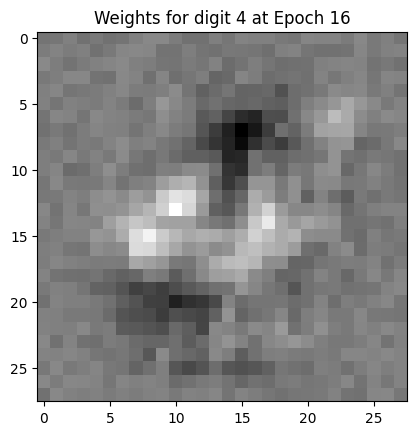

Epoch[17/100], loss: 0.244288, acc: 0.945000


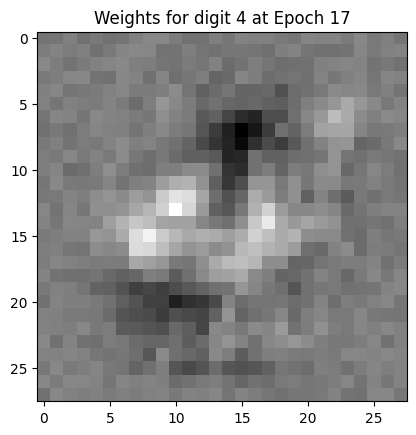

Epoch[18/100], loss: 0.243185, acc: 0.945000


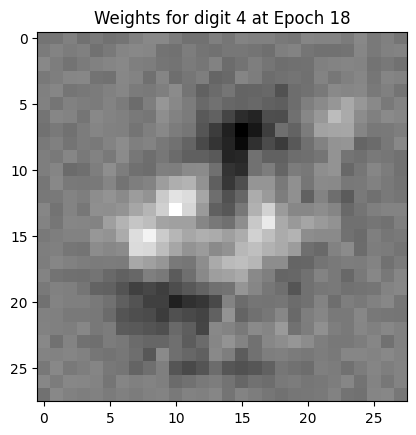

Epoch[19/100], loss: 0.242094, acc: 0.945000


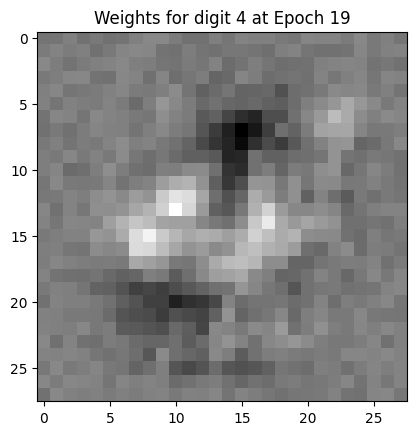

Epoch[20/100], loss: 0.241014, acc: 0.945000


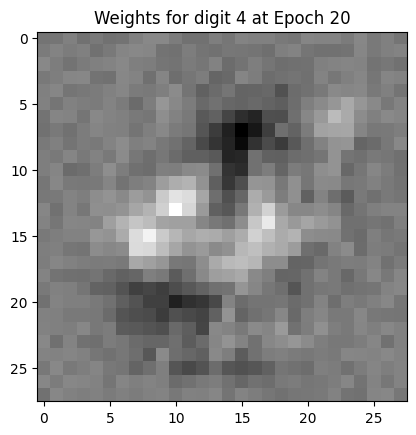

Epoch[21/100], loss: 0.239944, acc: 0.945000


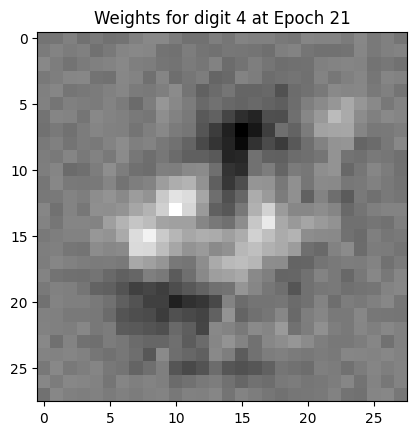

Epoch[22/100], loss: 0.238885, acc: 0.945000


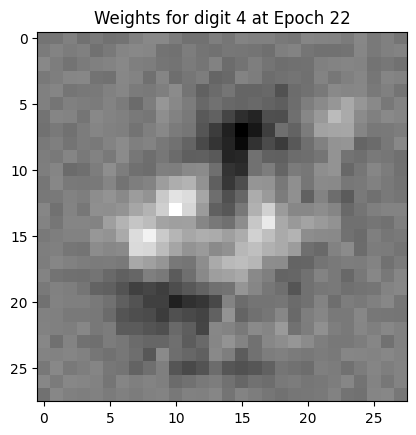

Epoch[23/100], loss: 0.237836, acc: 0.947000


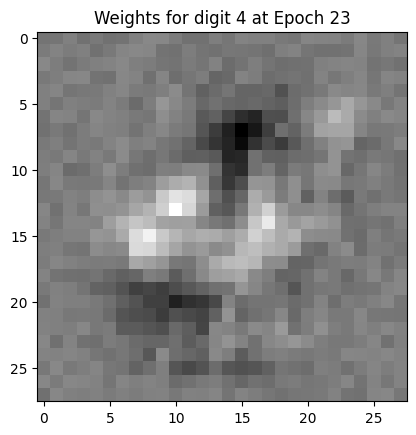

Epoch[24/100], loss: 0.236798, acc: 0.947000


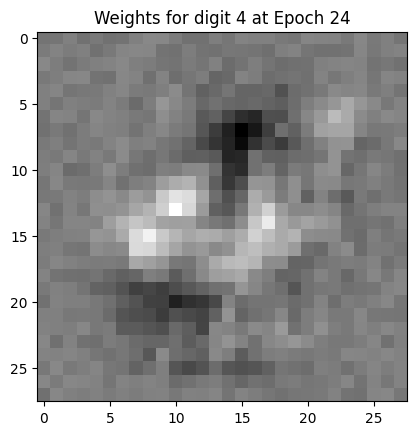

Epoch[25/100], loss: 0.235769, acc: 0.947000


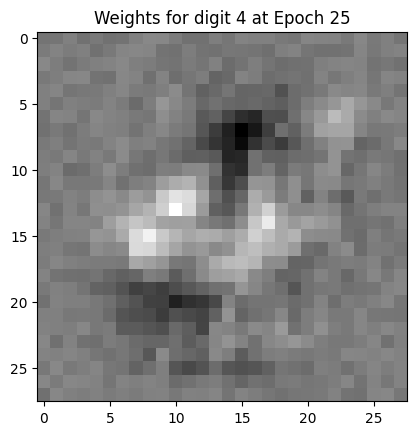

Epoch[26/100], loss: 0.234751, acc: 0.947000


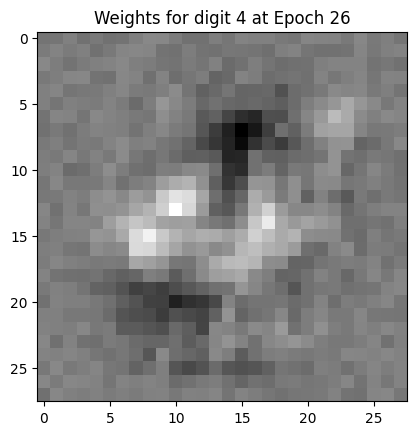

Epoch[27/100], loss: 0.233742, acc: 0.948000


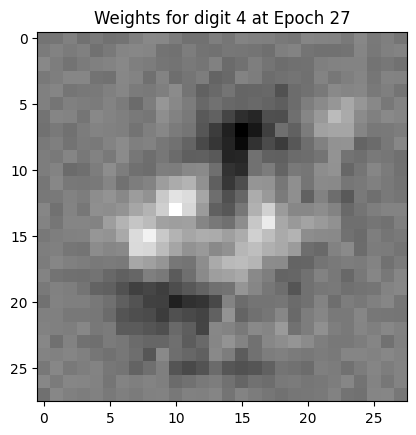

Epoch[28/100], loss: 0.232742, acc: 0.950000


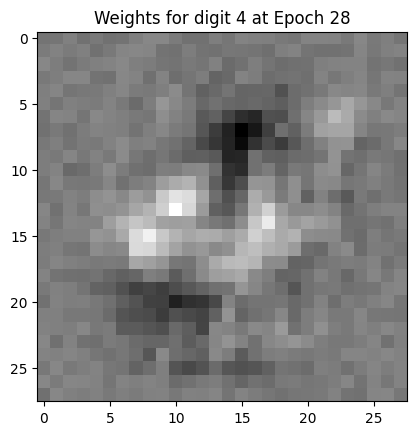

Epoch[29/100], loss: 0.231752, acc: 0.952000


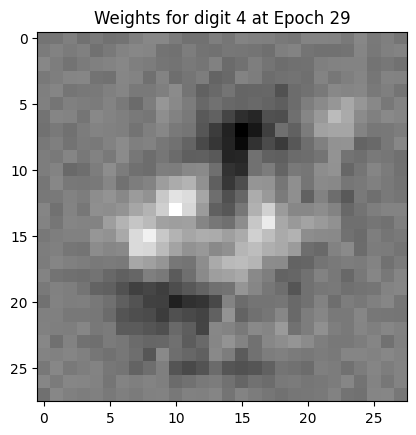

Epoch[30/100], loss: 0.230771, acc: 0.953000


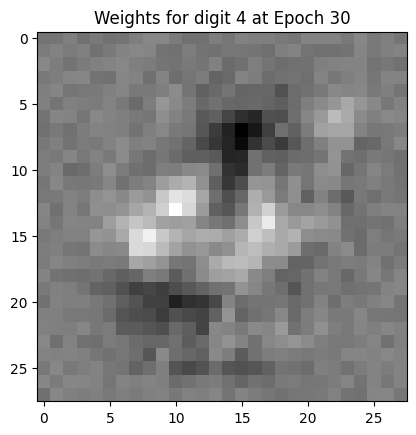

Epoch[31/100], loss: 0.229799, acc: 0.953000


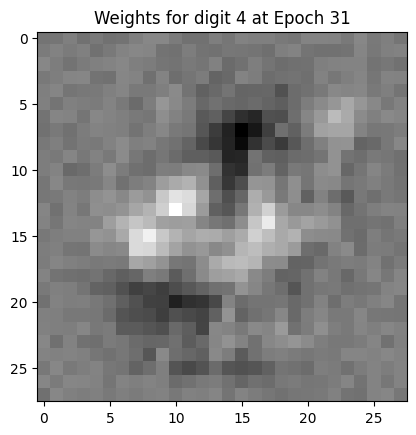

Epoch[32/100], loss: 0.228836, acc: 0.953000


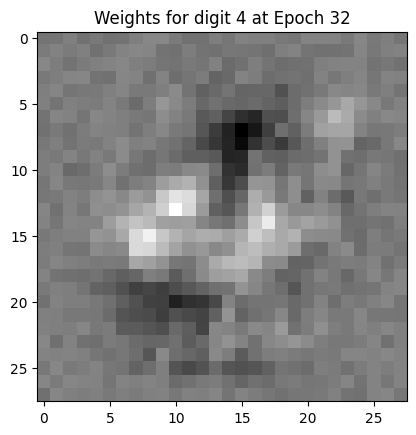

Epoch[33/100], loss: 0.227881, acc: 0.954000


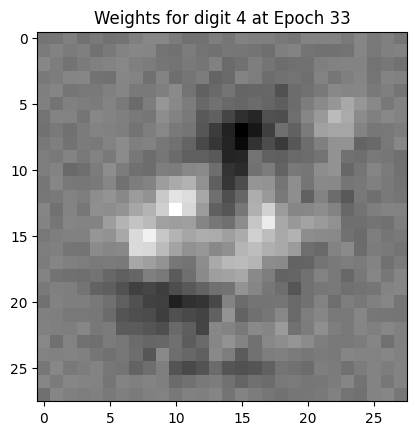

Epoch[34/100], loss: 0.226936, acc: 0.955000


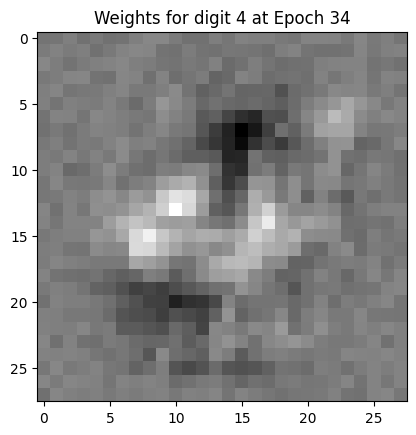

Epoch[35/100], loss: 0.225998, acc: 0.955000


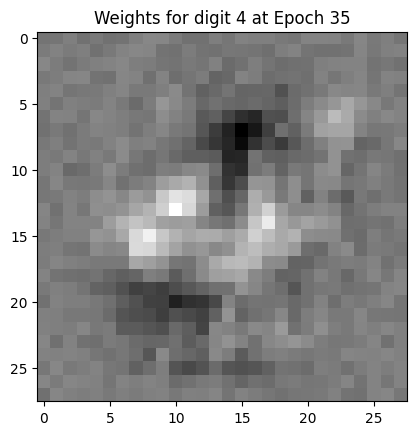

Epoch[36/100], loss: 0.225069, acc: 0.955000


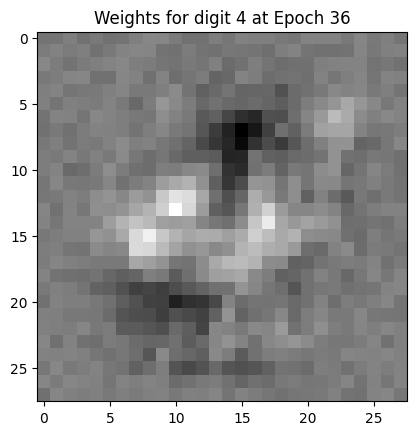

Epoch[37/100], loss: 0.224148, acc: 0.955000


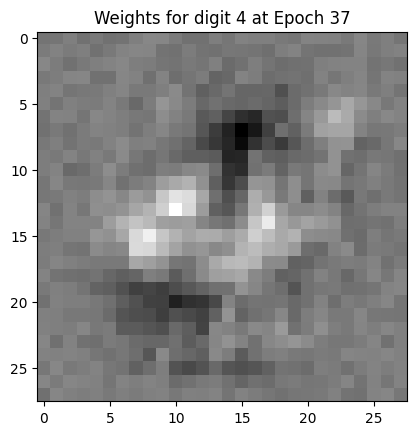

Epoch[38/100], loss: 0.223235, acc: 0.956000


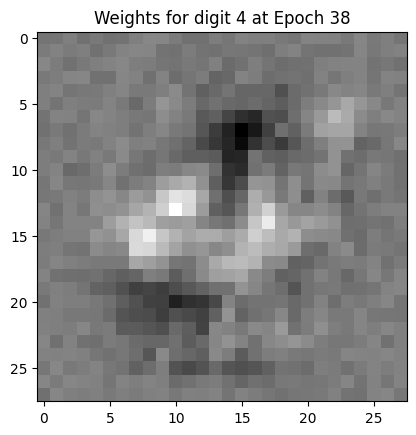

Epoch[39/100], loss: 0.222331, acc: 0.956000


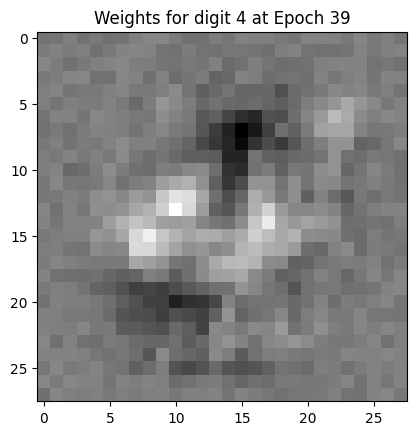

Epoch[40/100], loss: 0.221433, acc: 0.956000


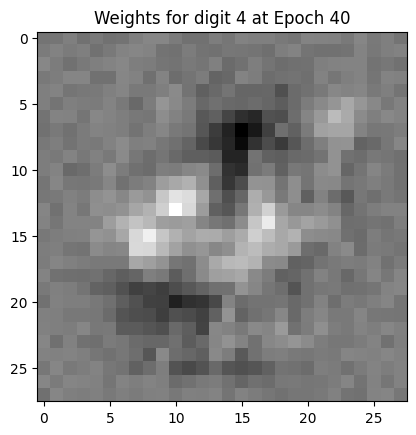

Epoch[41/100], loss: 0.220544, acc: 0.956000


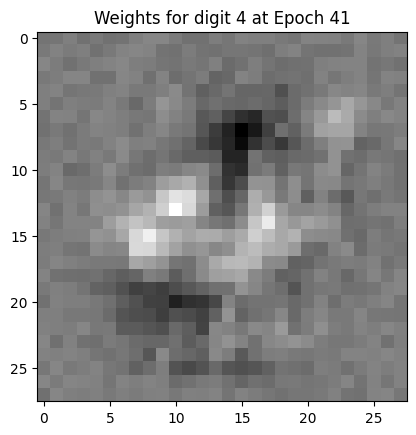

Epoch[42/100], loss: 0.219662, acc: 0.956000


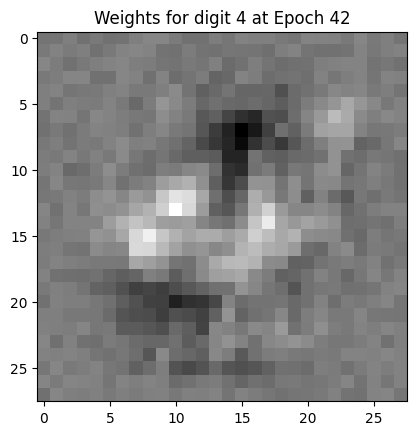

Epoch[43/100], loss: 0.218788, acc: 0.956000


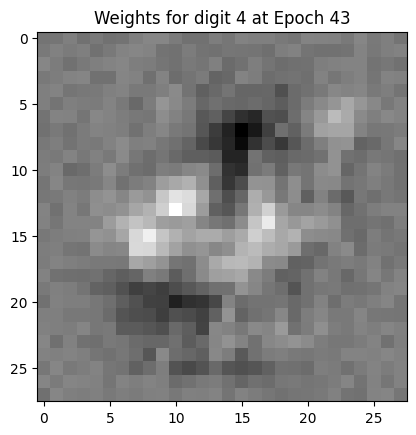

Epoch[44/100], loss: 0.217921, acc: 0.957000


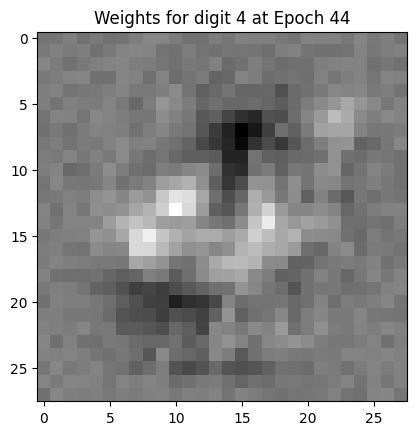

Epoch[45/100], loss: 0.217061, acc: 0.957000


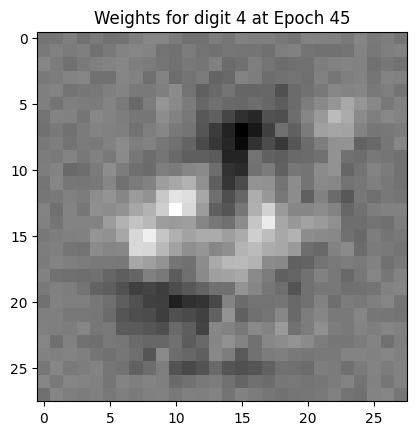

Epoch[46/100], loss: 0.216208, acc: 0.957000


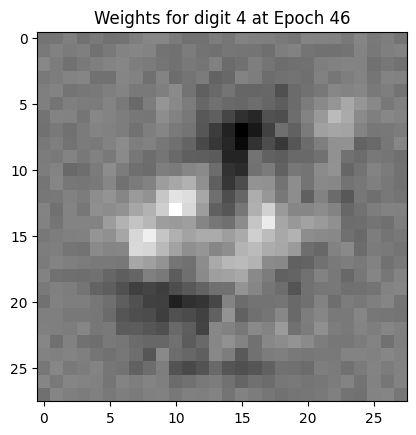

Epoch[47/100], loss: 0.215362, acc: 0.957000


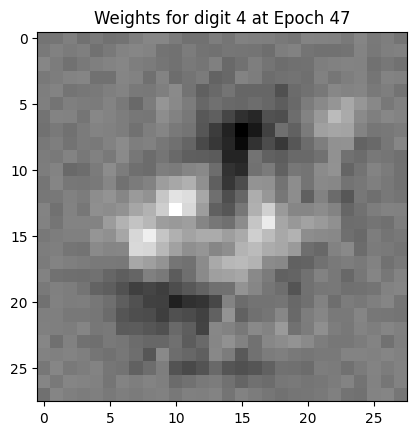

Epoch[48/100], loss: 0.214524, acc: 0.957000


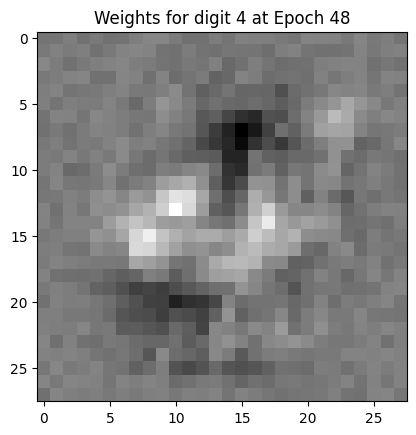

Epoch[49/100], loss: 0.213692, acc: 0.957000


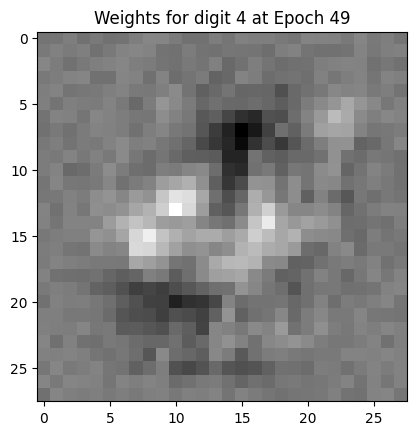

Epoch[50/100], loss: 0.212866, acc: 0.958000


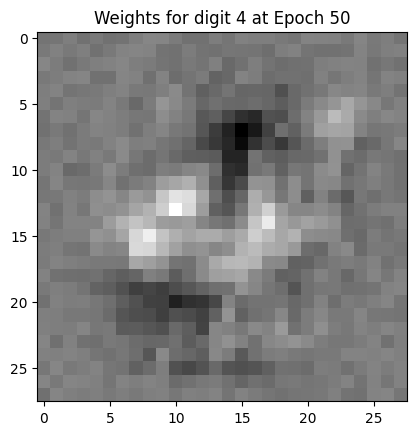

Epoch[51/100], loss: 0.212048, acc: 0.958000


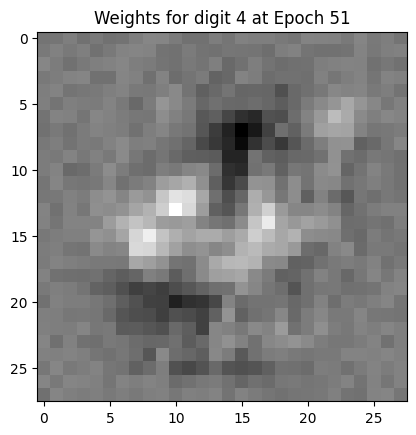

Epoch[52/100], loss: 0.211236, acc: 0.958000


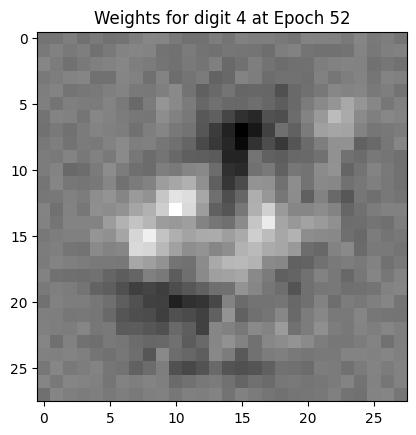

Epoch[53/100], loss: 0.210430, acc: 0.958000


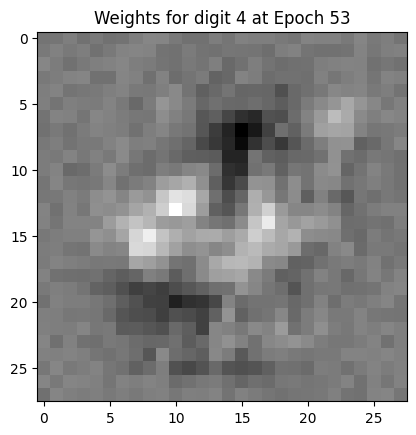

Epoch[54/100], loss: 0.209631, acc: 0.958000


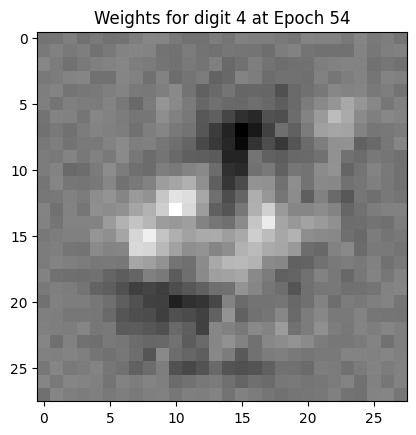

Epoch[55/100], loss: 0.208838, acc: 0.959000


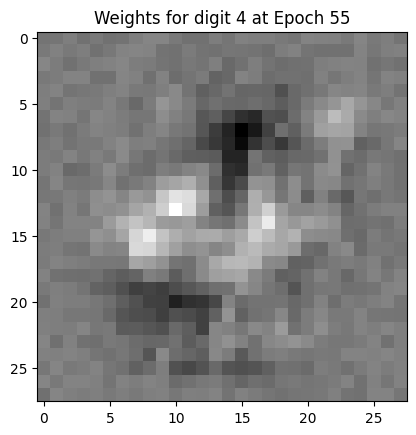

Epoch[56/100], loss: 0.208051, acc: 0.959000


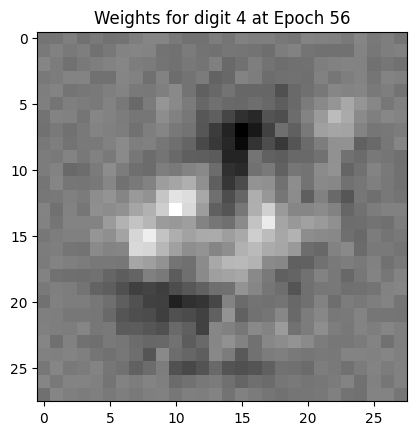

Epoch[57/100], loss: 0.207270, acc: 0.959000


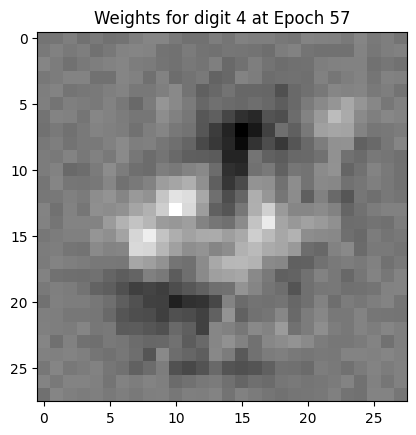

Epoch[58/100], loss: 0.206496, acc: 0.959000


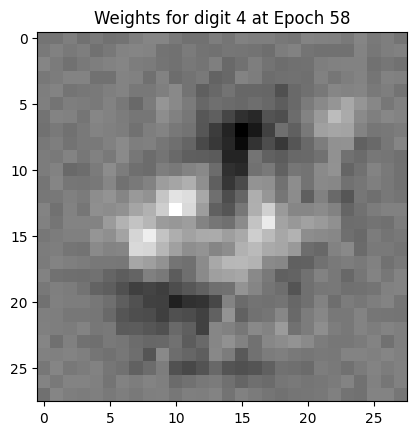

Epoch[59/100], loss: 0.205727, acc: 0.959000


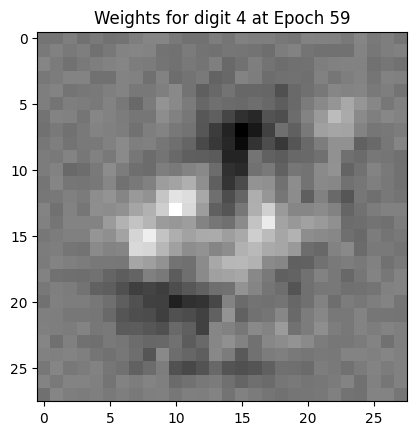

Epoch[60/100], loss: 0.204964, acc: 0.959000


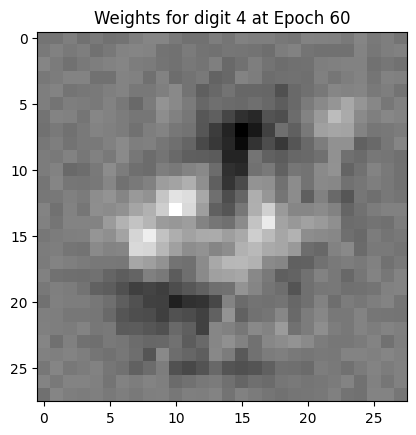

Epoch[61/100], loss: 0.204207, acc: 0.959000


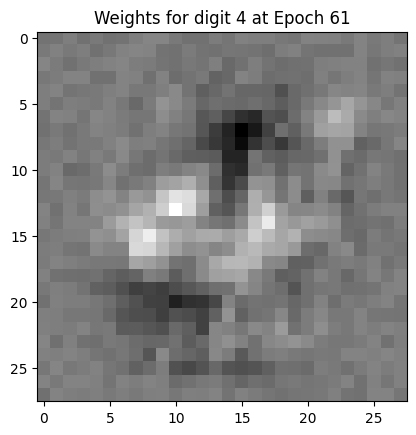

Epoch[62/100], loss: 0.203456, acc: 0.959000


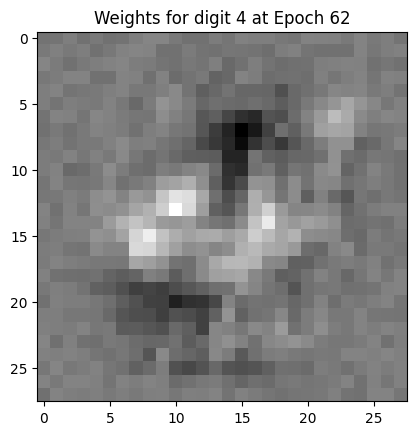

Epoch[63/100], loss: 0.202710, acc: 0.959000


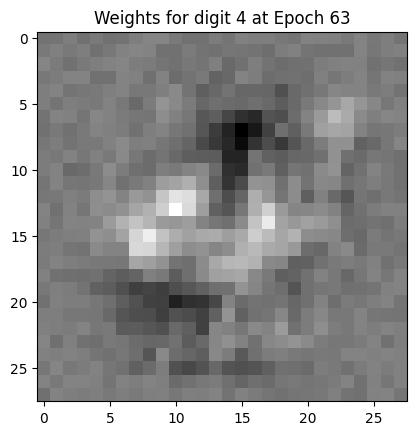

Epoch[64/100], loss: 0.201970, acc: 0.959000


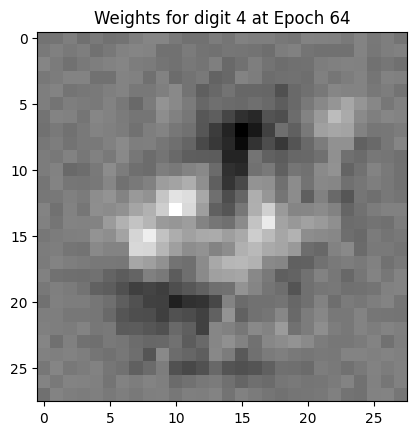

Epoch[65/100], loss: 0.201235, acc: 0.959000


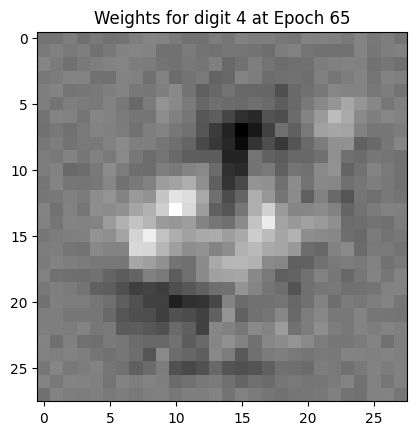

Epoch[66/100], loss: 0.200505, acc: 0.960000


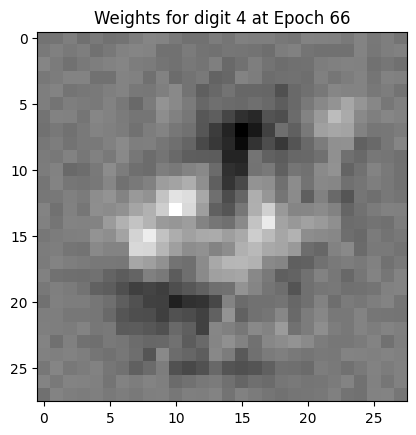

Epoch[67/100], loss: 0.199781, acc: 0.960000


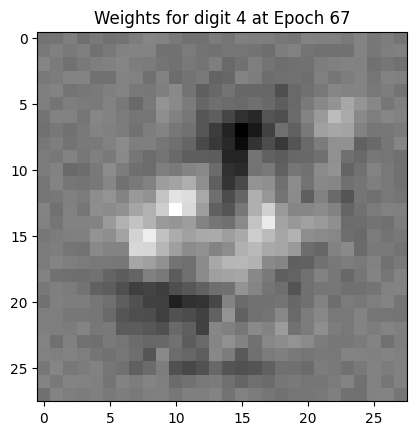

Epoch[68/100], loss: 0.199063, acc: 0.960000


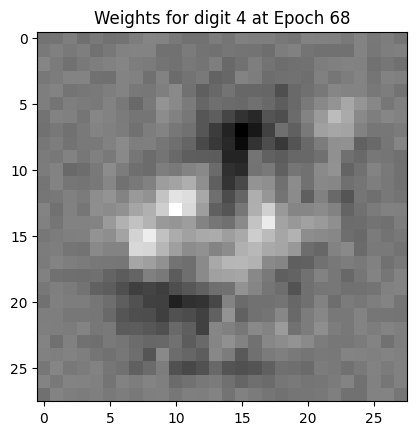

Epoch[69/100], loss: 0.198349, acc: 0.960000


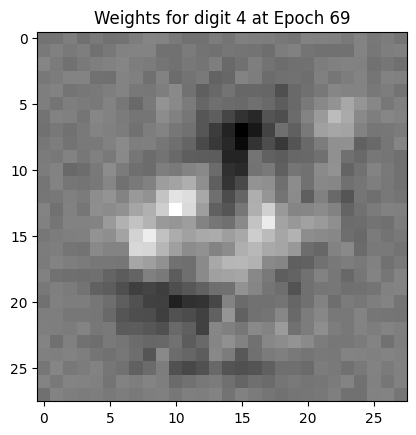

Epoch[70/100], loss: 0.197641, acc: 0.960000


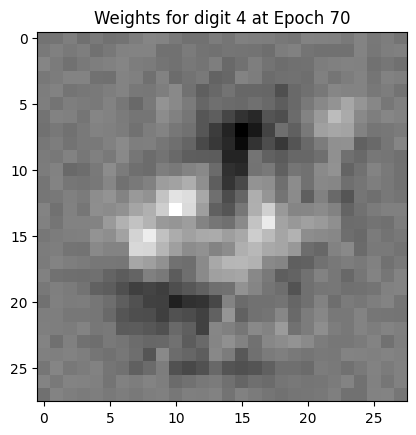

Epoch[71/100], loss: 0.196938, acc: 0.960000


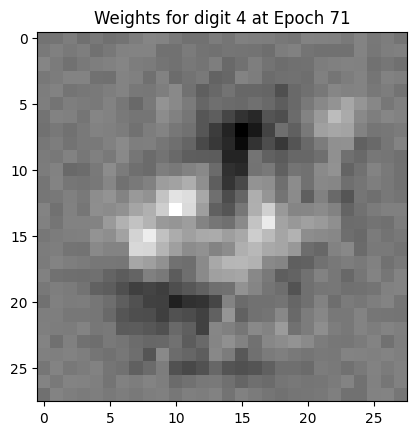

Epoch[72/100], loss: 0.196239, acc: 0.960000


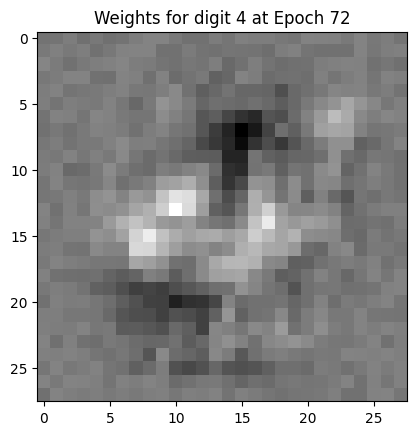

Epoch[73/100], loss: 0.195546, acc: 0.960000


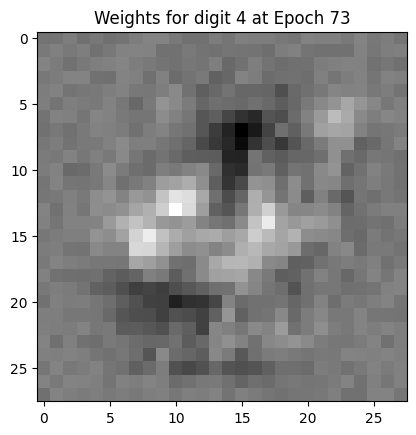

Epoch[74/100], loss: 0.194858, acc: 0.962000


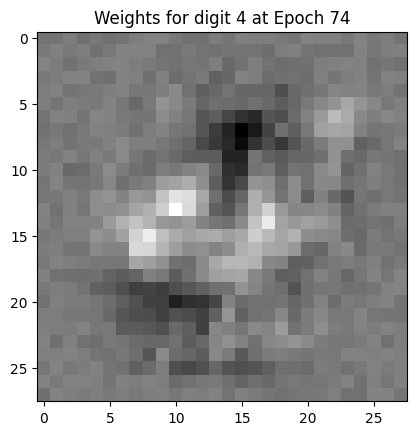

Epoch[75/100], loss: 0.194174, acc: 0.963000


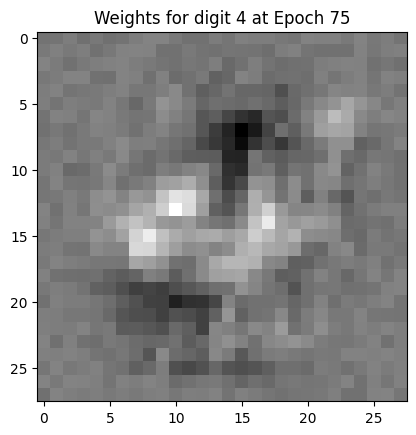

Epoch[76/100], loss: 0.193495, acc: 0.963000


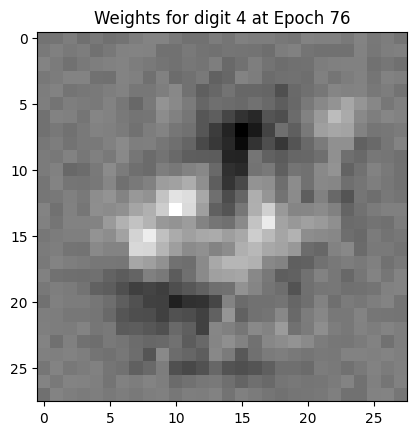

Epoch[77/100], loss: 0.192821, acc: 0.963000


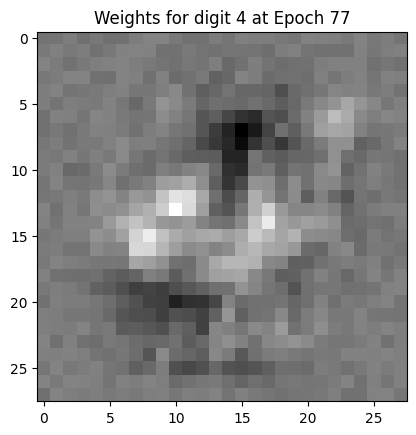

Epoch[78/100], loss: 0.192152, acc: 0.963000


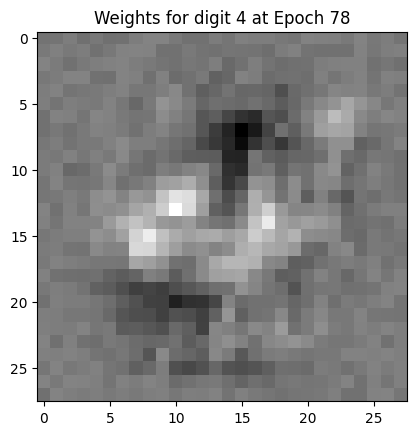

Epoch[79/100], loss: 0.191487, acc: 0.963000


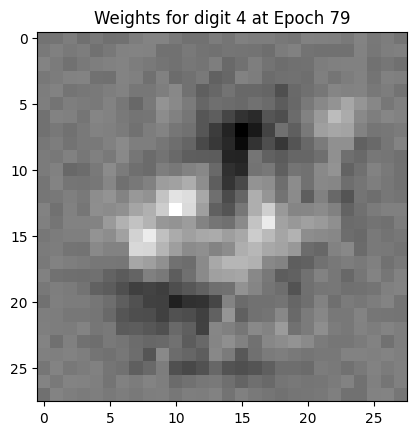

Epoch[80/100], loss: 0.190827, acc: 0.963000


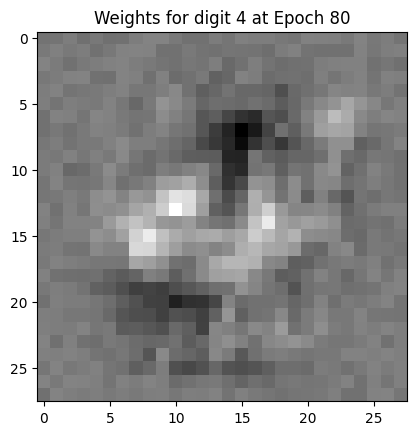

Epoch[81/100], loss: 0.190171, acc: 0.963000


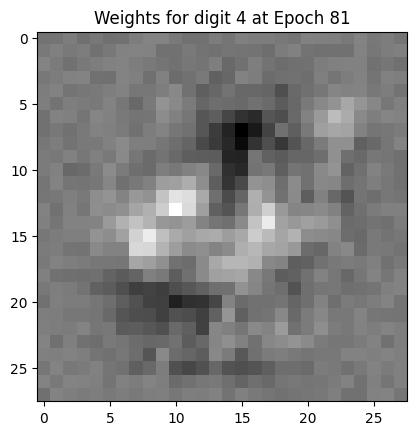

Epoch[82/100], loss: 0.189520, acc: 0.963000


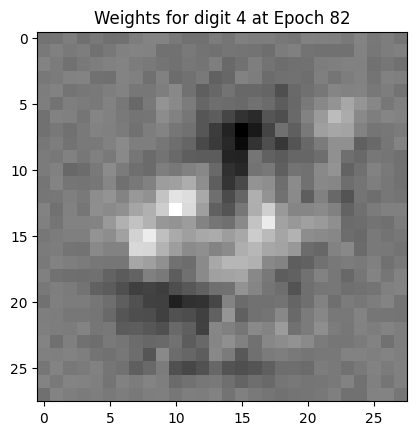

Epoch[83/100], loss: 0.188873, acc: 0.963000


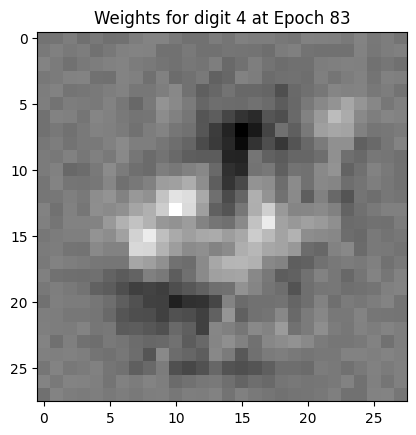

Epoch[84/100], loss: 0.188231, acc: 0.964000


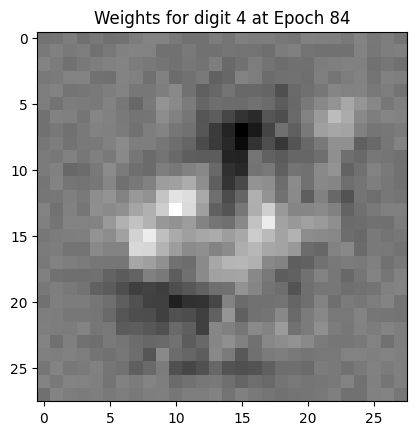

Epoch[85/100], loss: 0.187593, acc: 0.964000


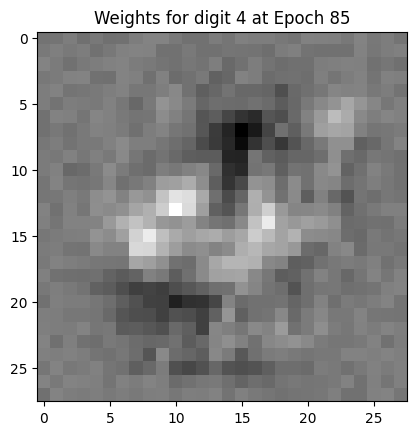

Epoch[86/100], loss: 0.186959, acc: 0.965000


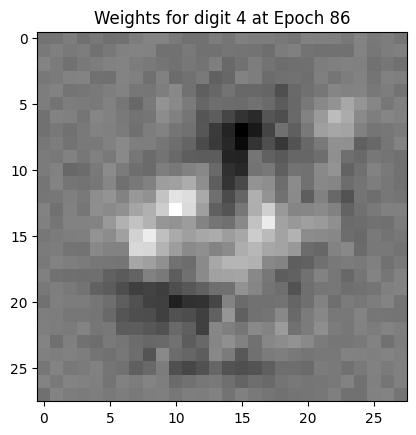

Epoch[87/100], loss: 0.186329, acc: 0.966000


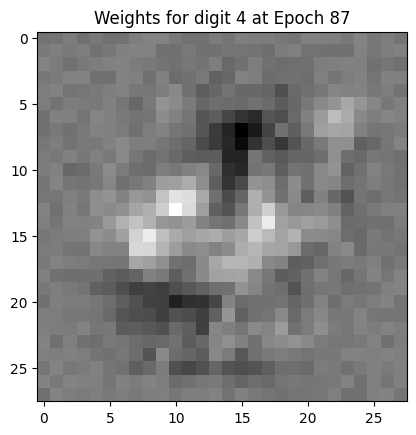

Epoch[88/100], loss: 0.185703, acc: 0.966000


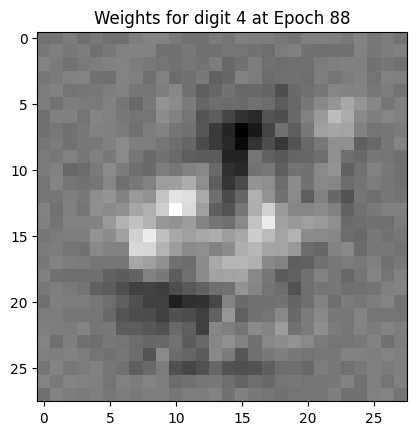

Epoch[89/100], loss: 0.185082, acc: 0.966000


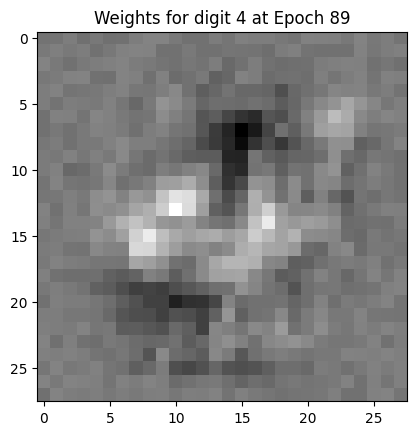

Epoch[90/100], loss: 0.184465, acc: 0.966000


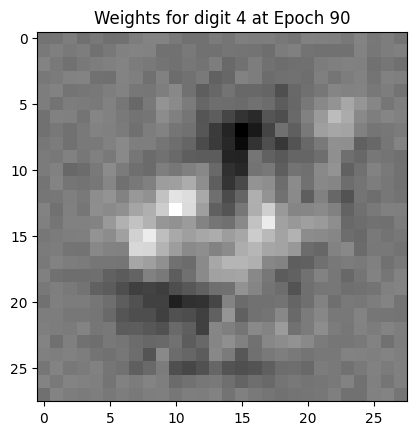

Epoch[91/100], loss: 0.183851, acc: 0.966000


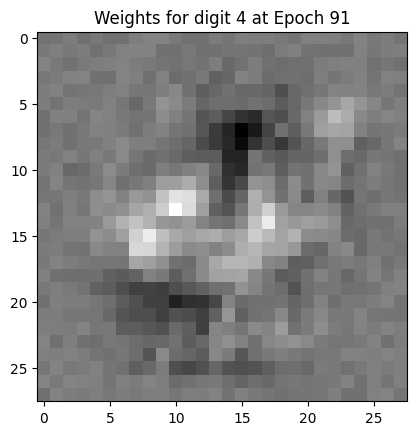

Epoch[92/100], loss: 0.183242, acc: 0.966000


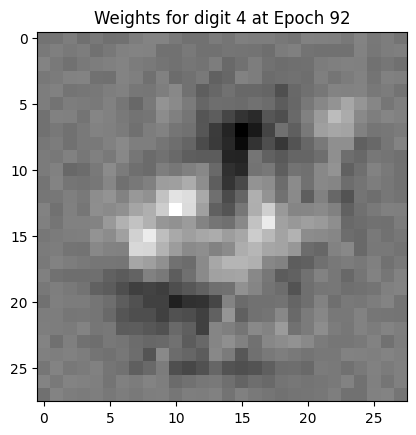

Epoch[93/100], loss: 0.182637, acc: 0.966000


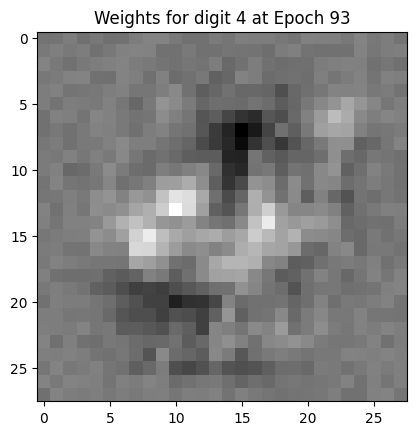

Epoch[94/100], loss: 0.182035, acc: 0.967000


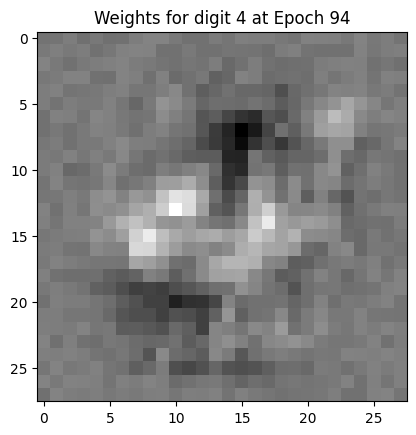

Epoch[95/100], loss: 0.181437, acc: 0.967000


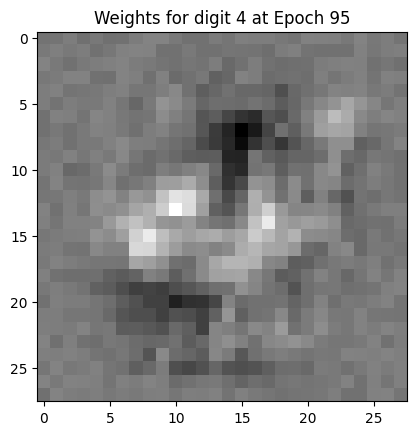

Epoch[96/100], loss: 0.180843, acc: 0.967000


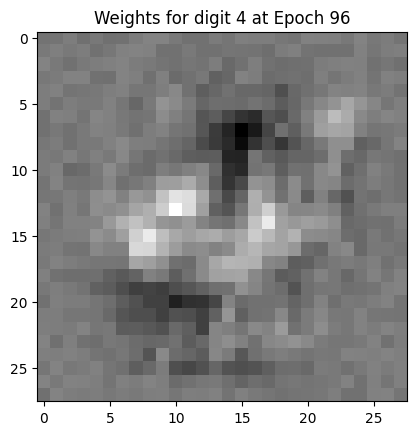

Epoch[97/100], loss: 0.180253, acc: 0.967000


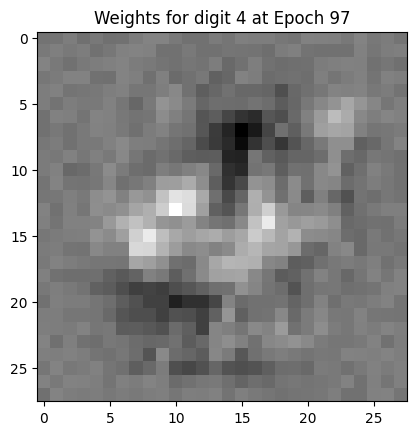

Epoch[98/100], loss: 0.179667, acc: 0.968000


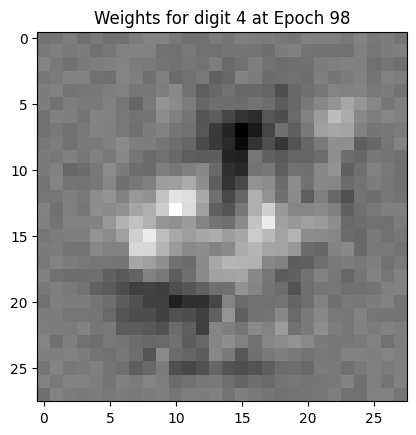

Epoch[99/100], loss: 0.179084, acc: 0.968000


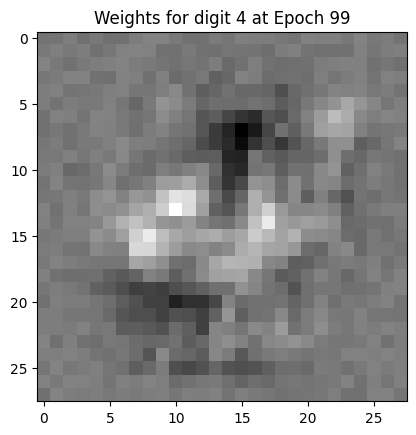

Epoch[100/100], loss: 0.178505, acc: 0.968000


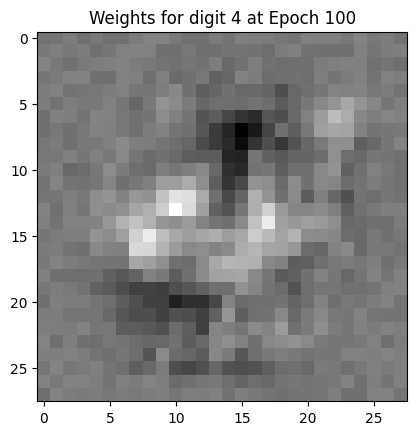

In [22]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'.format(i + 1, epochs, loss.item(), accuracy))


    weights = model.state_dict()['weight']
    plt.imshow(weights[4, :].numpy().reshape((28,28)), cmap='gray')
    plt.title(f'Weights for digit 4 at Epoch {i+1}')
    plt.show()

In [37]:
print('Final loss:', loss.item())

Final loss: 2.3065457344055176


### Visualizando gráfico de perda durante o treinamento

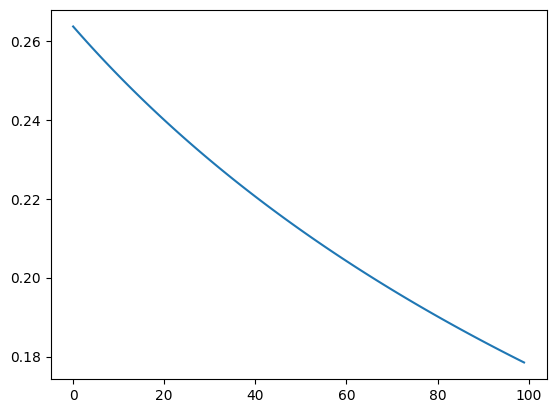

In [38]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [39]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.117


### Matriz de confusão com dados de treinamento e teste

In [40]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,4,0,3,0,1,0,0,17,0,1
1,4,2,12,0,17,3,13,8,11,17
2,32,100,41,57,33,28,14,59,41,49
3,1,0,18,9,17,7,5,21,9,10
4,0,0,0,0,0,3,0,0,0,1
5,0,0,0,0,3,1,0,0,1,5
6,22,6,19,17,21,37,52,4,20,10
7,0,8,2,1,10,1,2,4,0,4
8,23,0,2,6,3,10,8,2,4,3


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


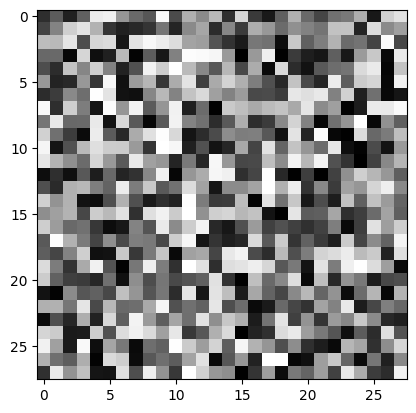

In [41]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

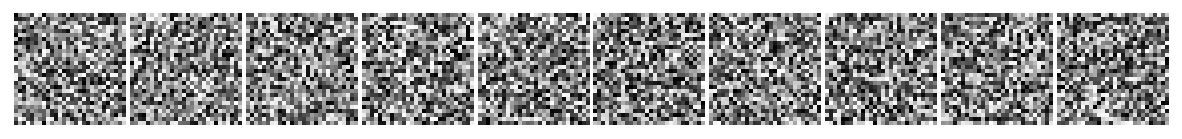

In [42]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Epoch[1/100], loss: 0.263679, acc: 0.944000


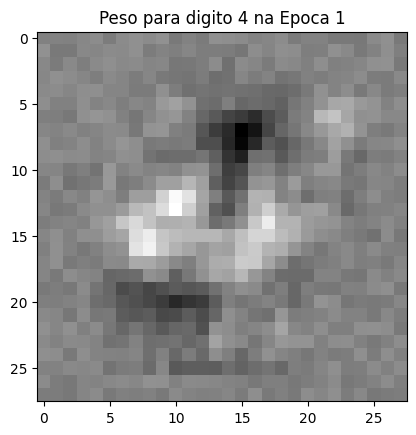

Epoch[2/100], loss: 0.262368, acc: 0.944000


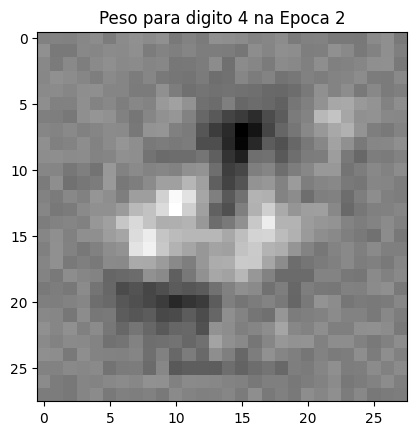

Epoch[3/100], loss: 0.261071, acc: 0.944000


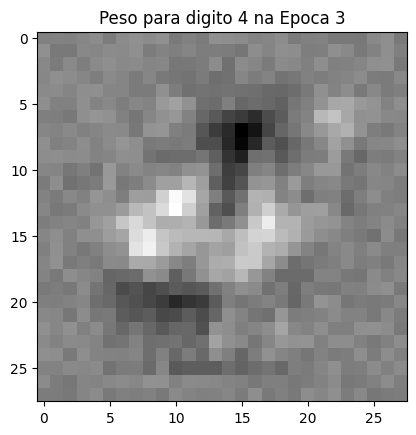

Epoch[4/100], loss: 0.259790, acc: 0.944000


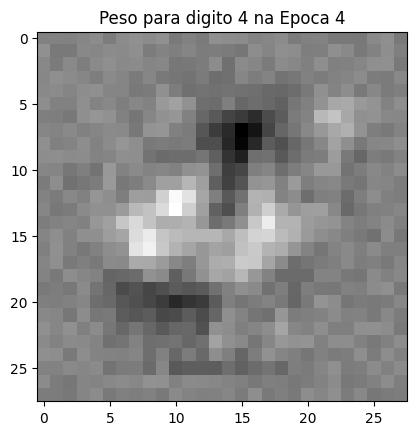

Epoch[5/100], loss: 0.258524, acc: 0.944000


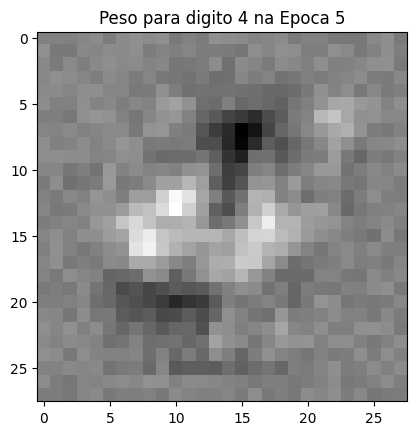

Epoch[6/100], loss: 0.257272, acc: 0.944000


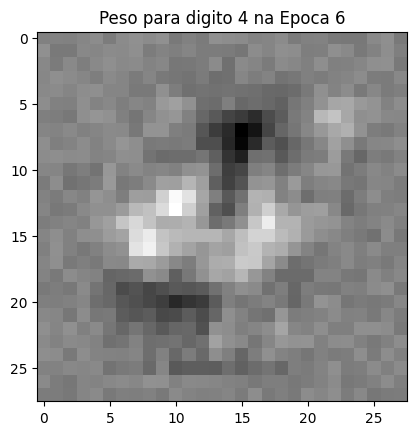

Epoch[7/100], loss: 0.256033, acc: 0.945000


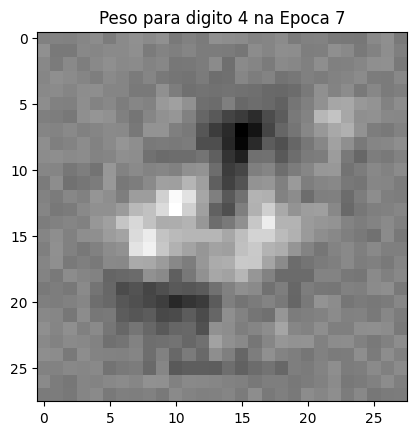

Epoch[8/100], loss: 0.254809, acc: 0.946000


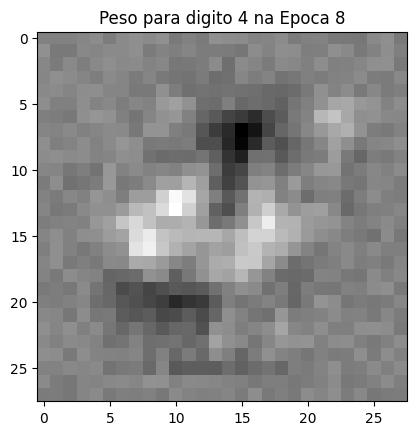

Epoch[9/100], loss: 0.253599, acc: 0.946000


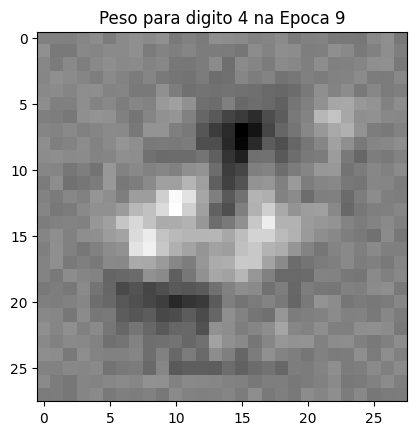

Epoch[10/100], loss: 0.252401, acc: 0.947000


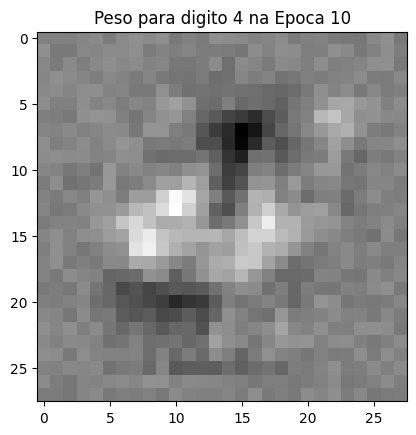

Epoch[11/100], loss: 0.251217, acc: 0.947000


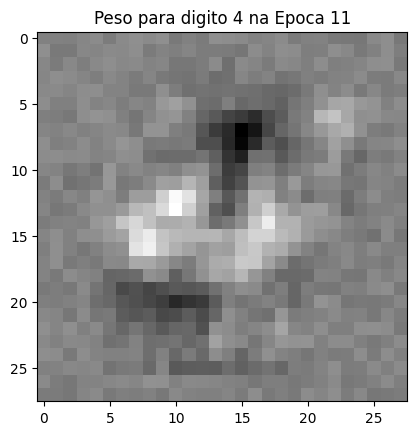

Epoch[12/100], loss: 0.250045, acc: 0.947000


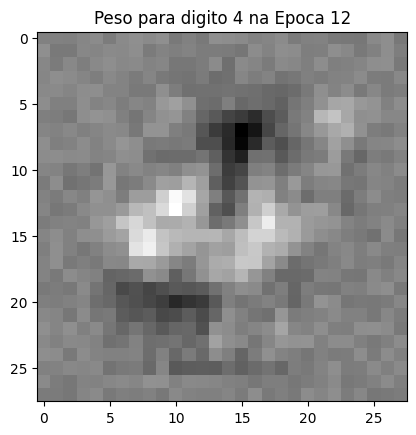

Epoch[13/100], loss: 0.248885, acc: 0.947000


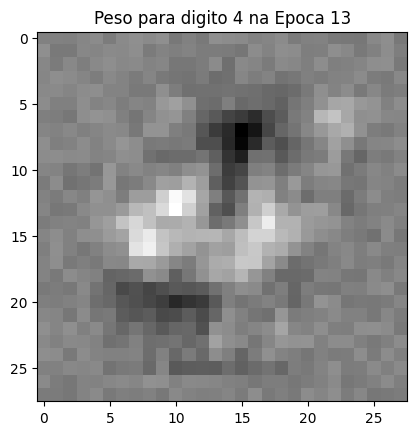

Epoch[14/100], loss: 0.247738, acc: 0.948000


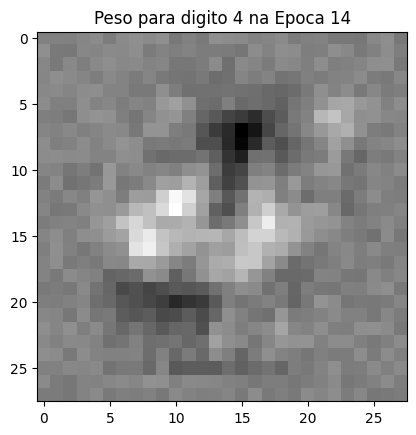

Epoch[15/100], loss: 0.246603, acc: 0.948000


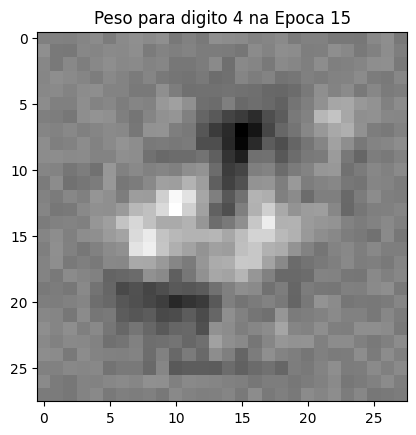

Epoch[16/100], loss: 0.245480, acc: 0.948000


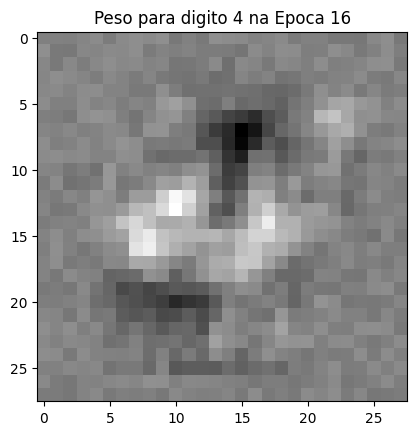

Epoch[17/100], loss: 0.244368, acc: 0.948000


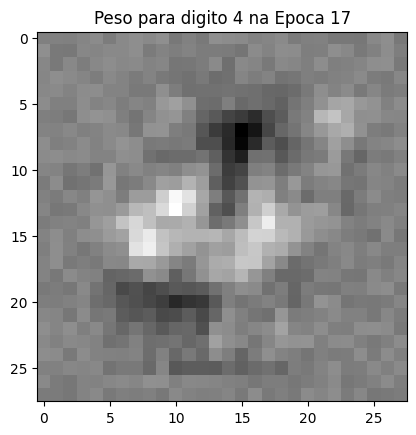

Epoch[18/100], loss: 0.243267, acc: 0.948000


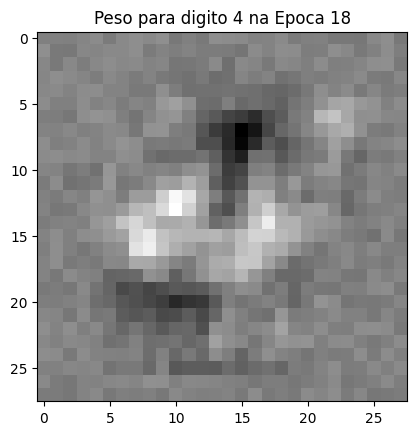

Epoch[19/100], loss: 0.242178, acc: 0.948000


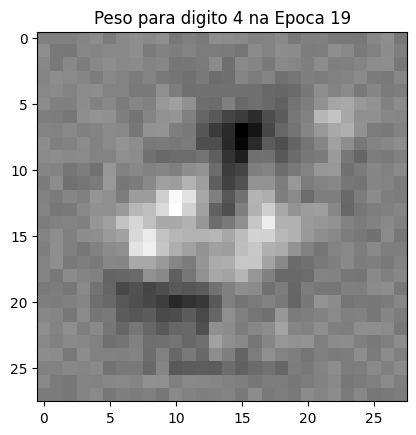

Epoch[20/100], loss: 0.241099, acc: 0.949000


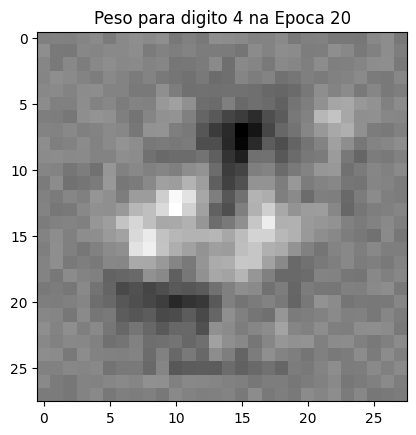

Epoch[21/100], loss: 0.240031, acc: 0.950000


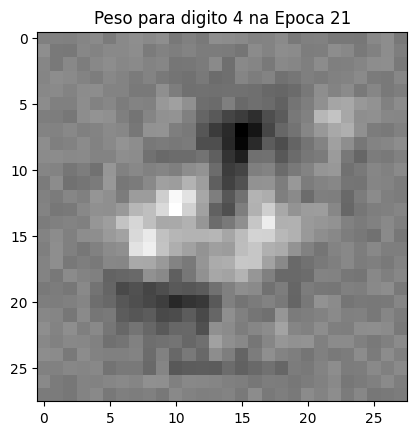

Epoch[22/100], loss: 0.238974, acc: 0.951000


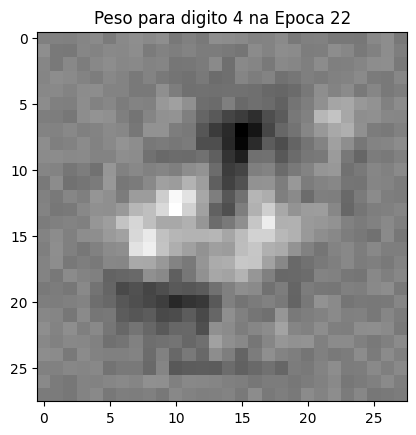

Epoch[23/100], loss: 0.237927, acc: 0.951000


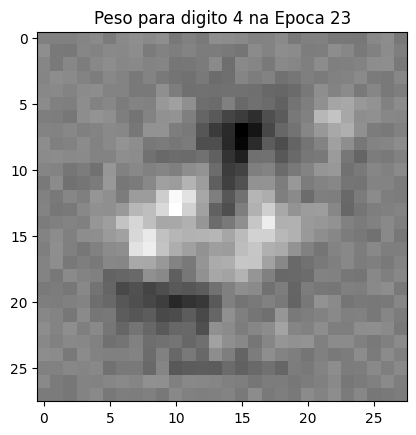

Epoch[24/100], loss: 0.236890, acc: 0.951000


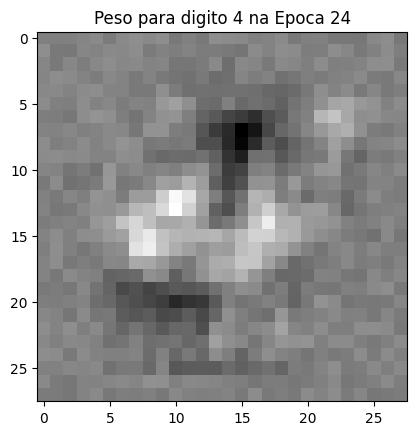

Epoch[25/100], loss: 0.235863, acc: 0.951000


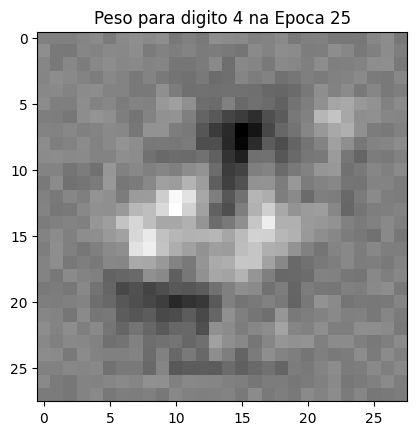

Epoch[26/100], loss: 0.234845, acc: 0.951000


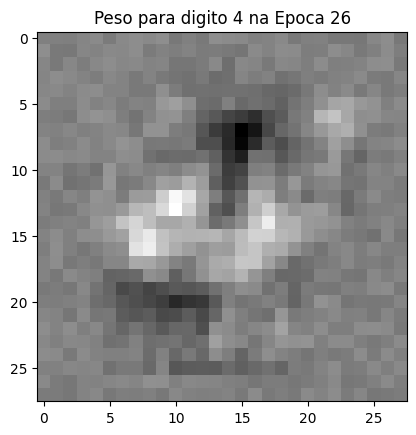

Epoch[27/100], loss: 0.233838, acc: 0.951000


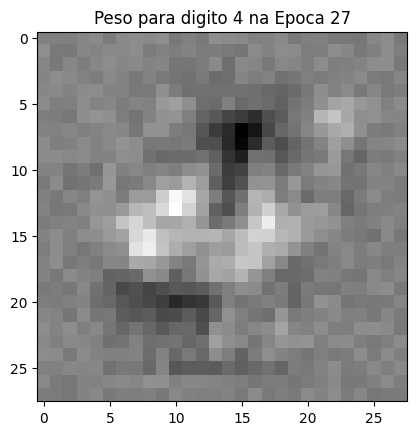

Epoch[28/100], loss: 0.232839, acc: 0.951000


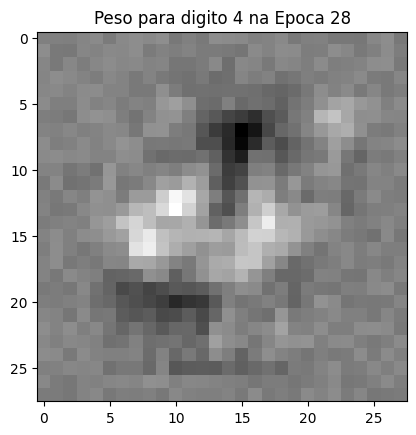

Epoch[29/100], loss: 0.231850, acc: 0.952000


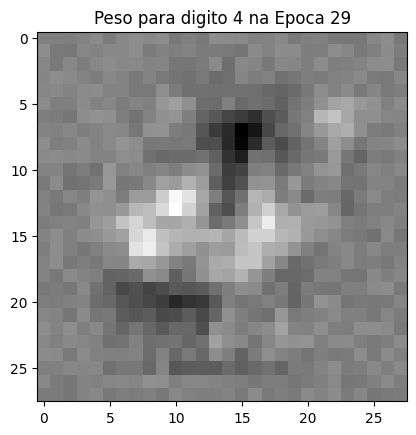

Epoch[30/100], loss: 0.230870, acc: 0.953000


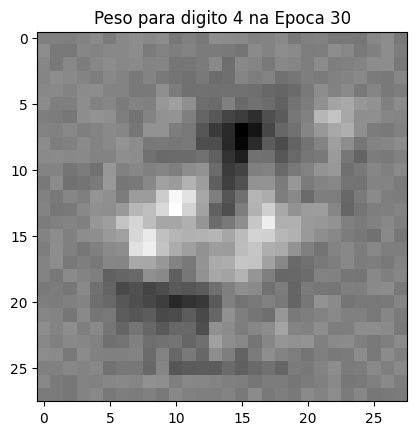

Epoch[31/100], loss: 0.229899, acc: 0.953000


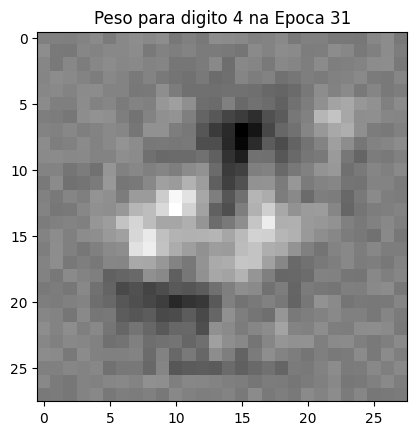

Epoch[32/100], loss: 0.228937, acc: 0.954000


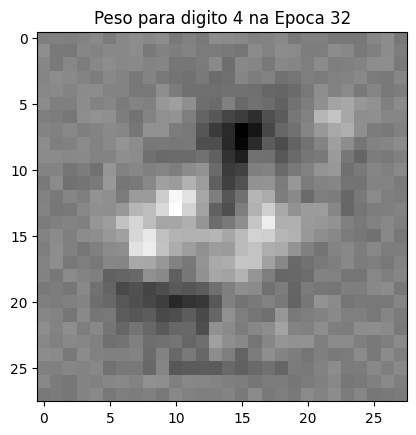

Epoch[33/100], loss: 0.227984, acc: 0.954000


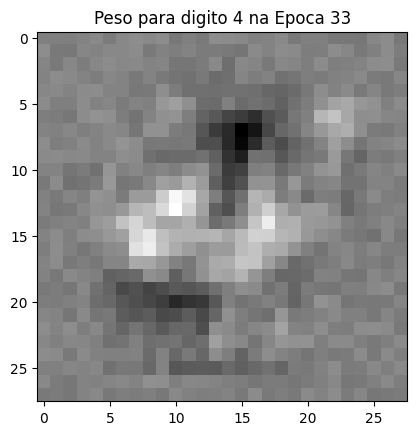

Epoch[34/100], loss: 0.227039, acc: 0.954000


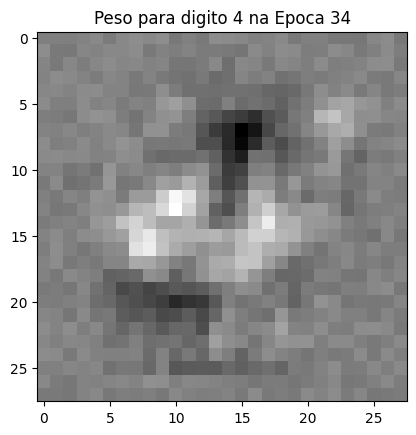

Epoch[35/100], loss: 0.226102, acc: 0.954000


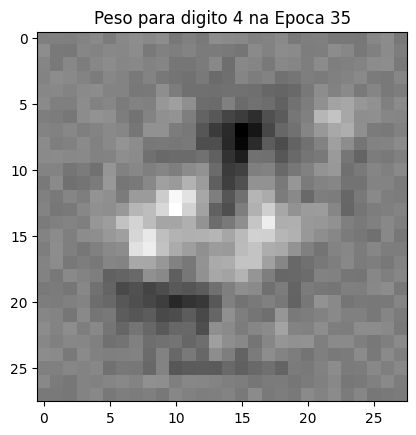

Epoch[36/100], loss: 0.225174, acc: 0.954000


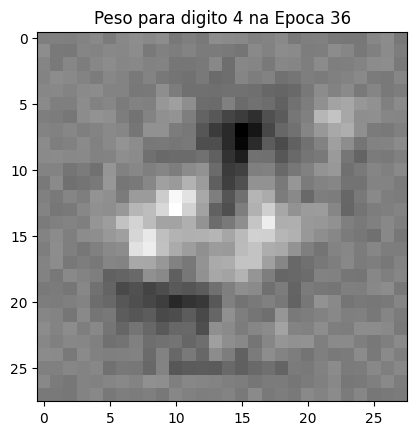

Epoch[37/100], loss: 0.224254, acc: 0.955000


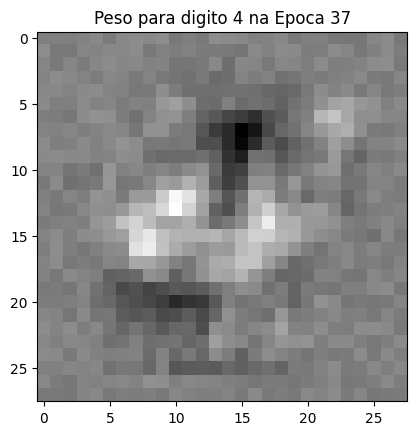

Epoch[38/100], loss: 0.223342, acc: 0.955000


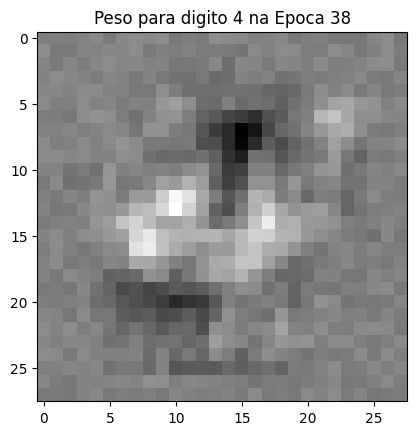

Epoch[39/100], loss: 0.222438, acc: 0.955000


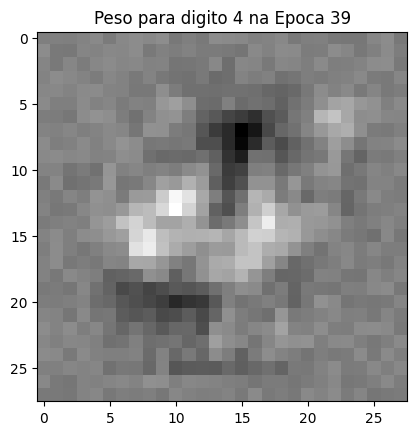

Epoch[40/100], loss: 0.221541, acc: 0.955000


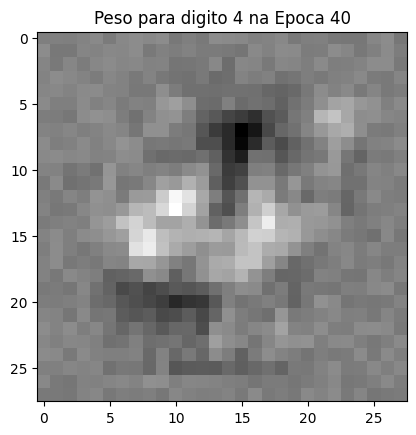

Epoch[41/100], loss: 0.220652, acc: 0.955000


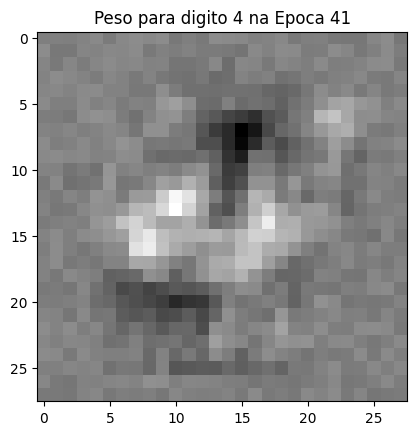

Epoch[42/100], loss: 0.219771, acc: 0.955000


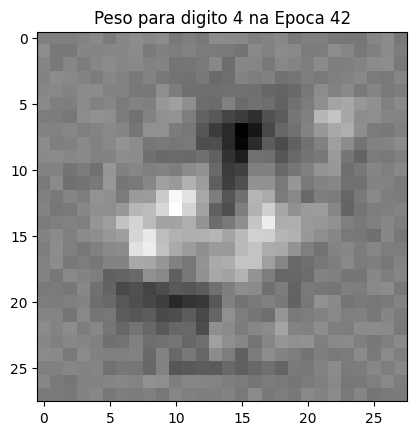

Epoch[43/100], loss: 0.218897, acc: 0.955000


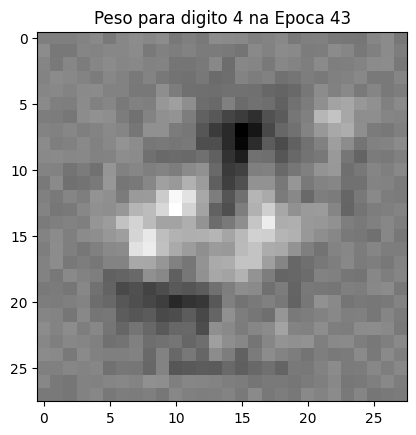

Epoch[44/100], loss: 0.218030, acc: 0.955000


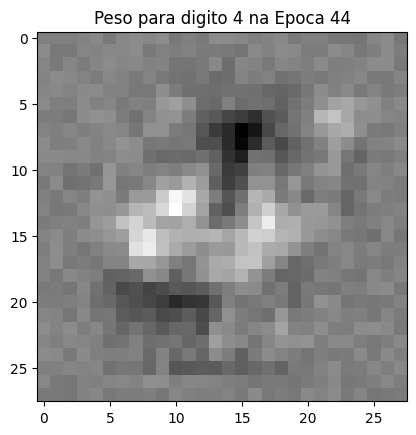

Epoch[45/100], loss: 0.217171, acc: 0.955000


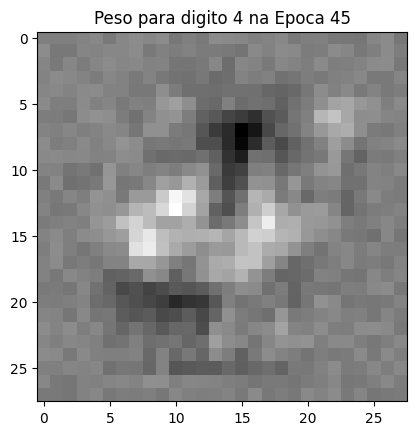

Epoch[46/100], loss: 0.216319, acc: 0.956000


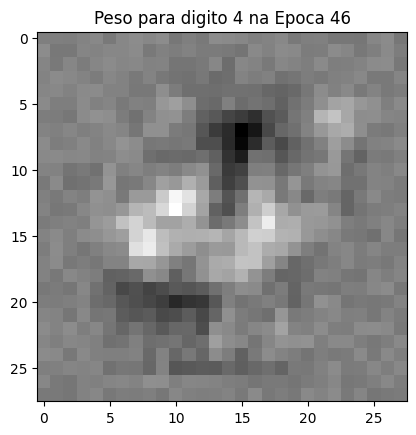

Epoch[47/100], loss: 0.215473, acc: 0.956000


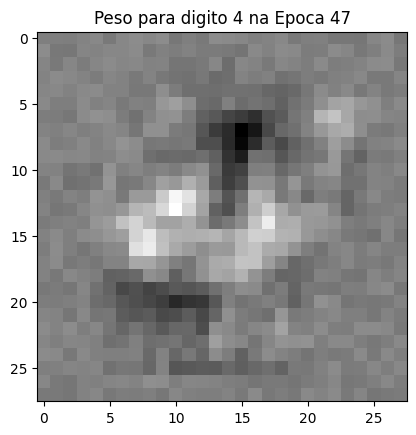

Epoch[48/100], loss: 0.214635, acc: 0.956000


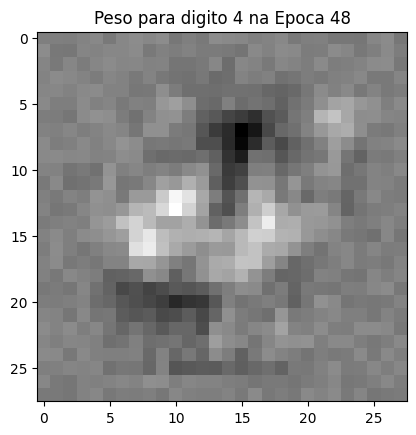

Epoch[49/100], loss: 0.213803, acc: 0.957000


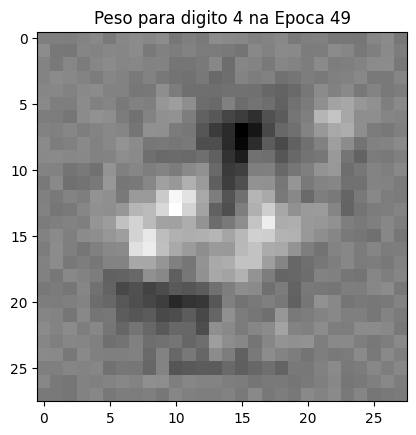

Epoch[50/100], loss: 0.212978, acc: 0.957000


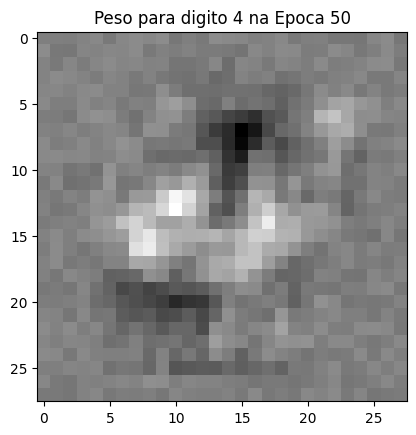

Epoch[51/100], loss: 0.212160, acc: 0.957000


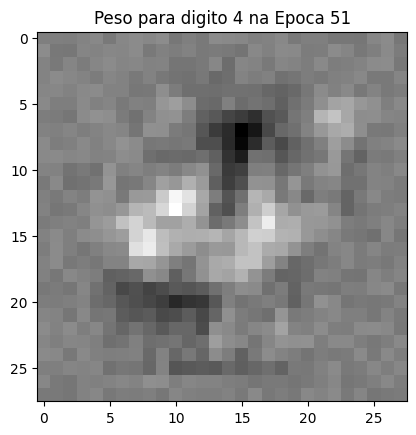

Epoch[52/100], loss: 0.211348, acc: 0.957000


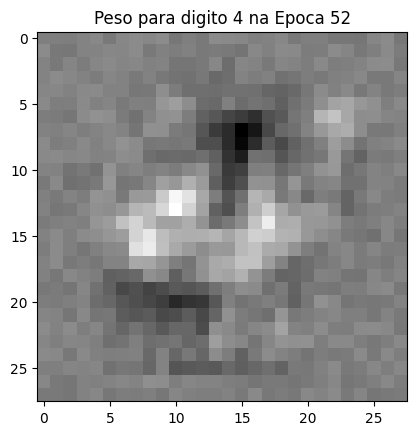

Epoch[53/100], loss: 0.210542, acc: 0.958000


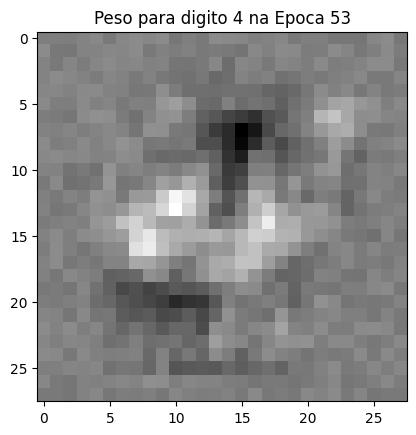

Epoch[54/100], loss: 0.209743, acc: 0.959000


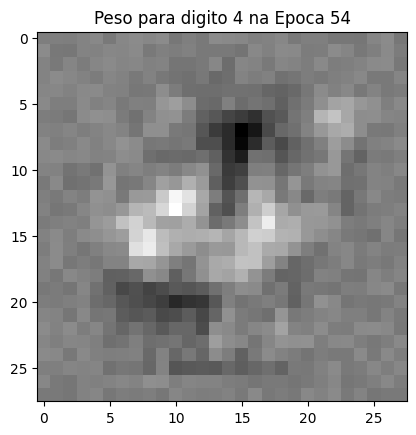

Epoch[55/100], loss: 0.208950, acc: 0.959000


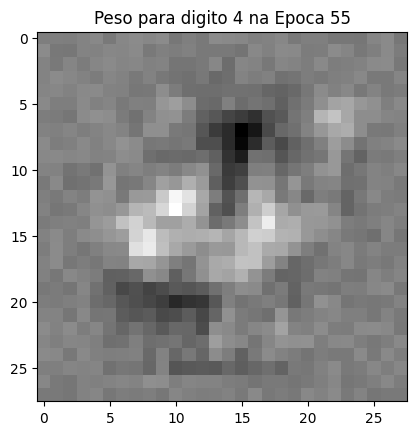

Epoch[56/100], loss: 0.208163, acc: 0.959000


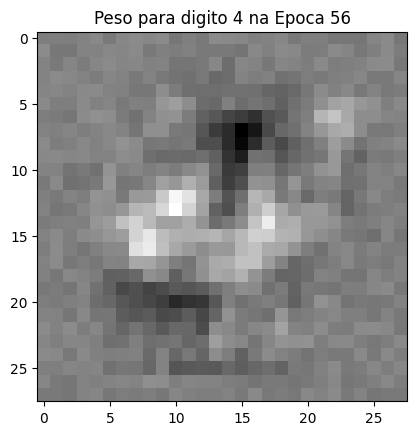

Epoch[57/100], loss: 0.207382, acc: 0.959000


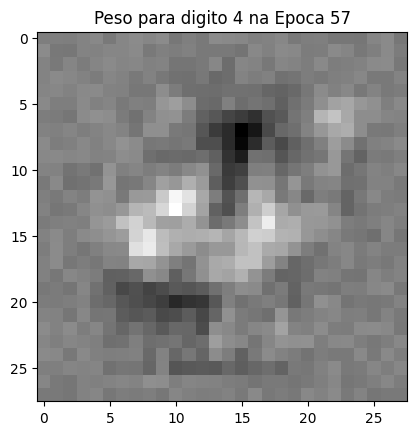

Epoch[58/100], loss: 0.206608, acc: 0.959000


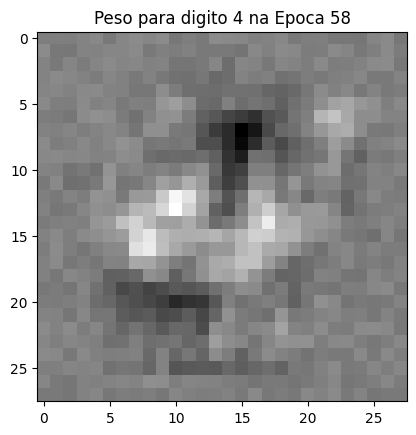

Epoch[59/100], loss: 0.205839, acc: 0.959000


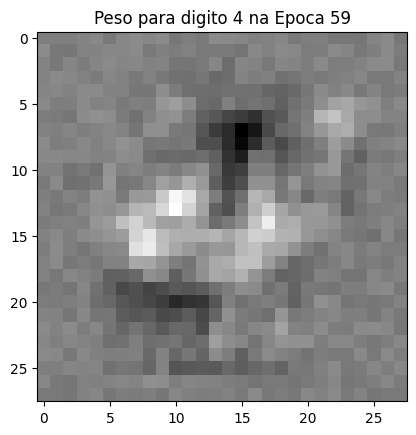

Epoch[60/100], loss: 0.205076, acc: 0.959000


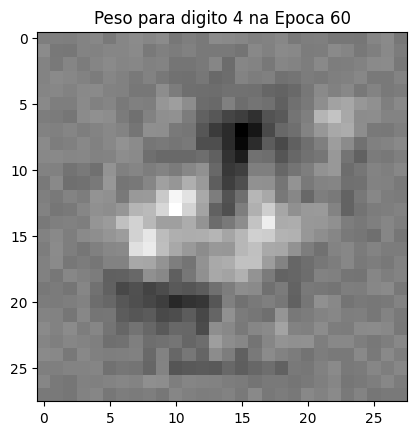

Epoch[61/100], loss: 0.204318, acc: 0.959000


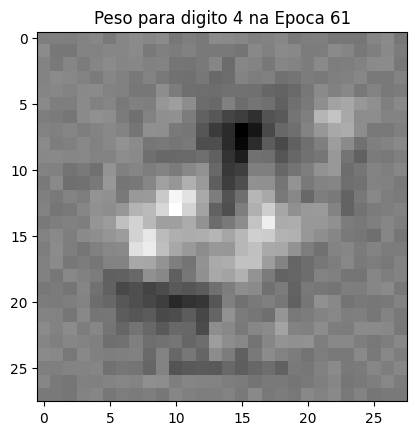

Epoch[62/100], loss: 0.203567, acc: 0.960000


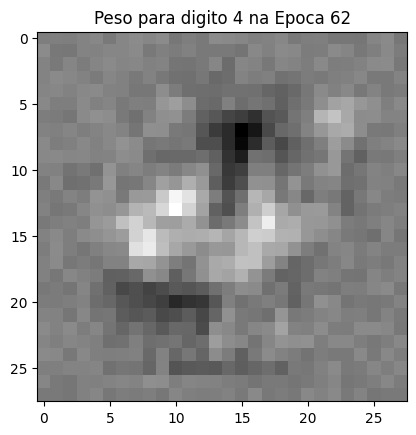

Epoch[63/100], loss: 0.202821, acc: 0.960000


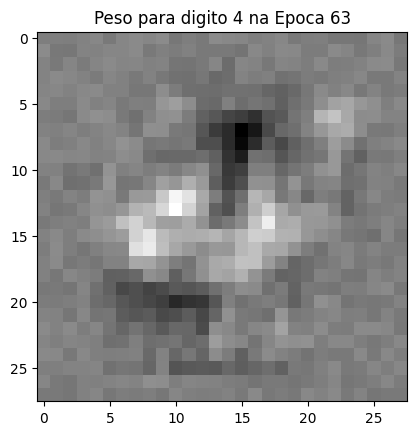

Epoch[64/100], loss: 0.202080, acc: 0.961000


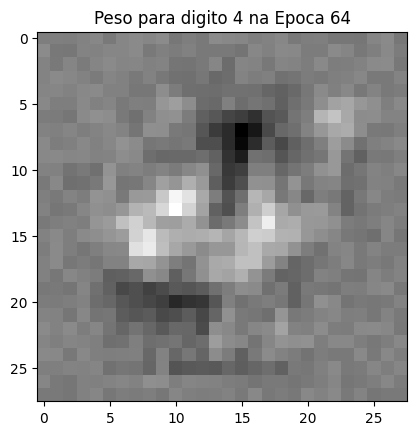

Epoch[65/100], loss: 0.201345, acc: 0.961000


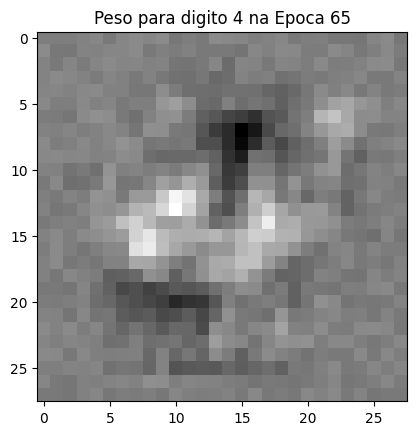

Epoch[66/100], loss: 0.200616, acc: 0.963000


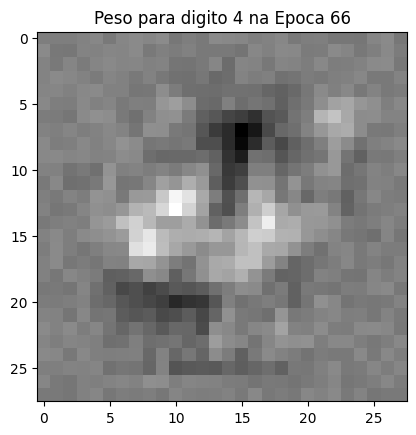

Epoch[67/100], loss: 0.199891, acc: 0.963000


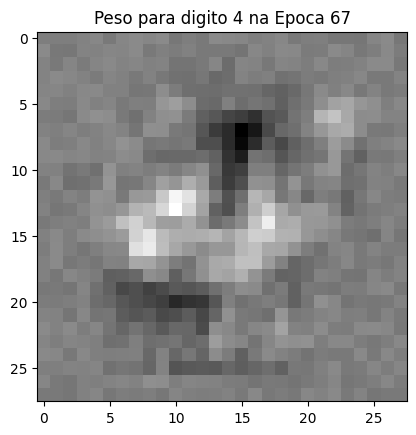

Epoch[68/100], loss: 0.199172, acc: 0.963000


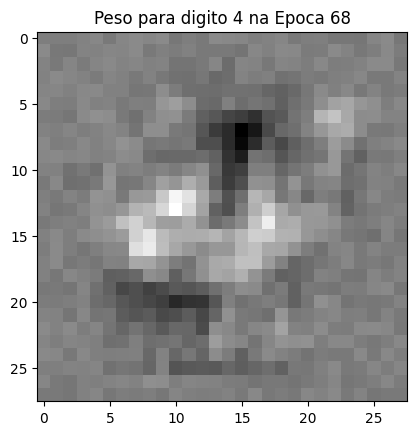

Epoch[69/100], loss: 0.198458, acc: 0.963000


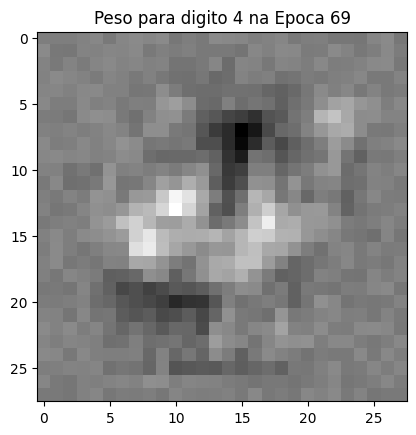

Epoch[70/100], loss: 0.197750, acc: 0.964000


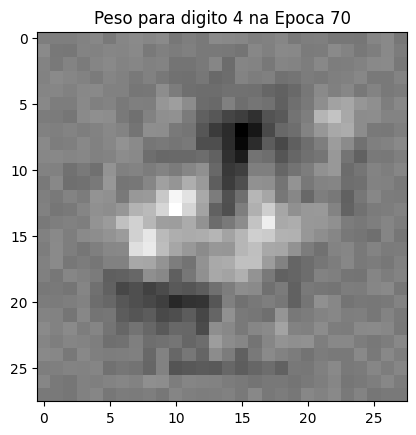

Epoch[71/100], loss: 0.197046, acc: 0.964000


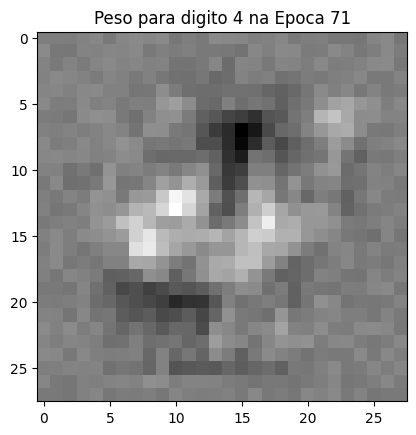

Epoch[72/100], loss: 0.196347, acc: 0.964000


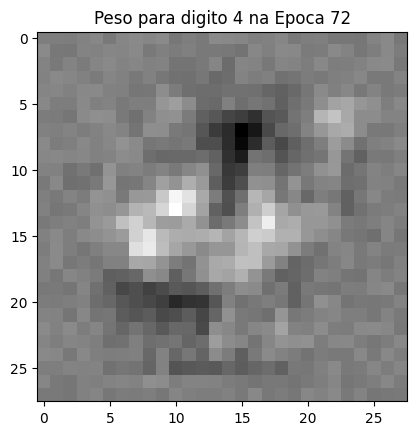

Epoch[73/100], loss: 0.195654, acc: 0.964000


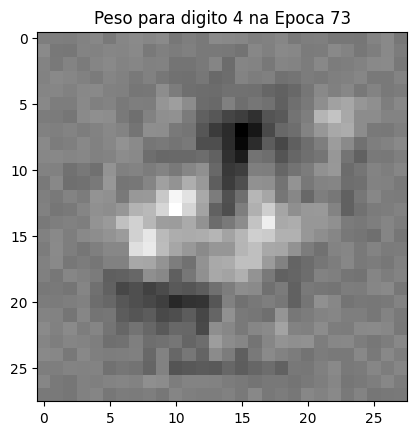

Epoch[74/100], loss: 0.194965, acc: 0.964000


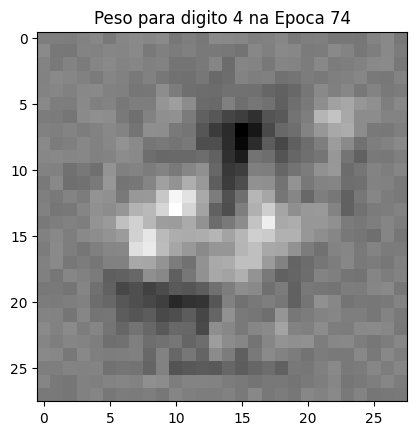

Epoch[75/100], loss: 0.194281, acc: 0.964000


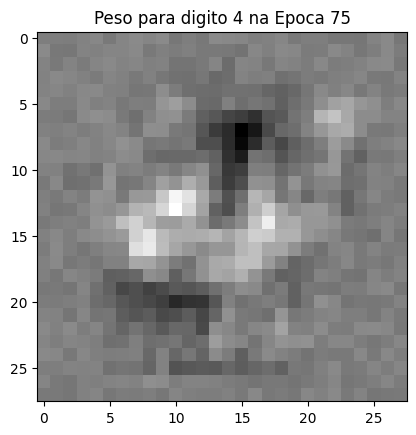

Epoch[76/100], loss: 0.193602, acc: 0.964000


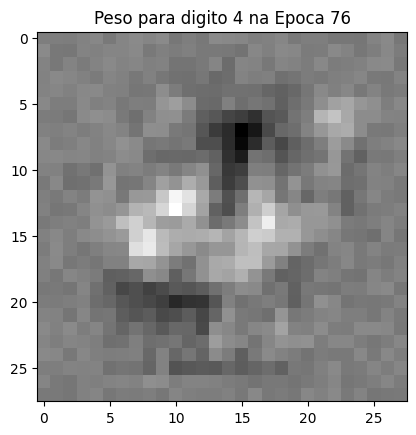

Epoch[77/100], loss: 0.192927, acc: 0.964000


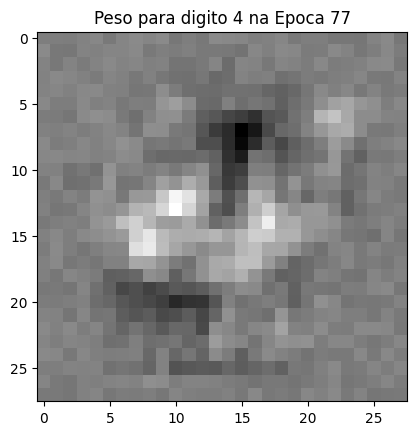

Epoch[78/100], loss: 0.192257, acc: 0.964000


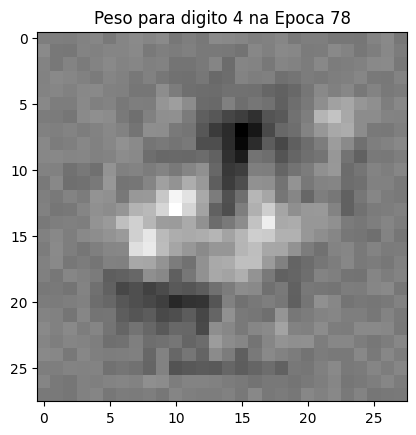

Epoch[79/100], loss: 0.191592, acc: 0.964000


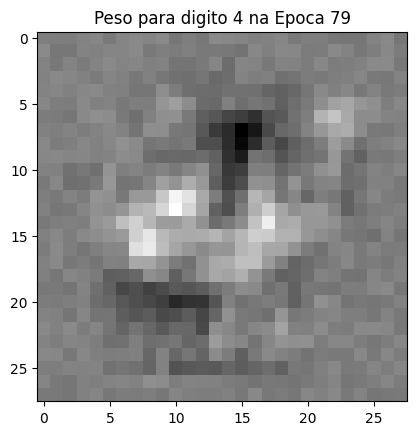

Epoch[80/100], loss: 0.190931, acc: 0.964000


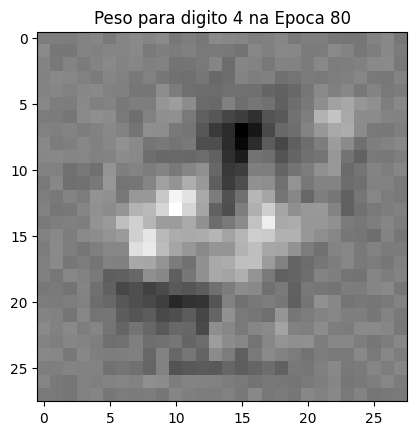

Epoch[81/100], loss: 0.190275, acc: 0.964000


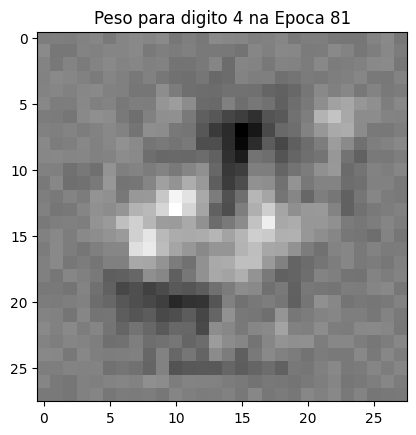

Epoch[82/100], loss: 0.189623, acc: 0.964000


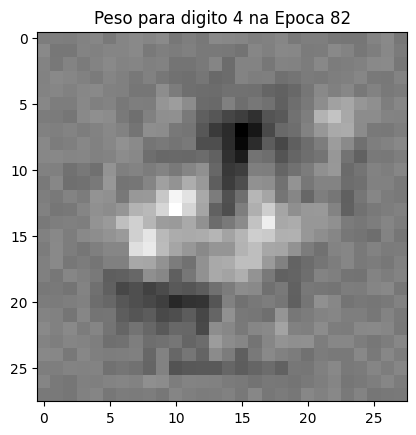

Epoch[83/100], loss: 0.188976, acc: 0.964000


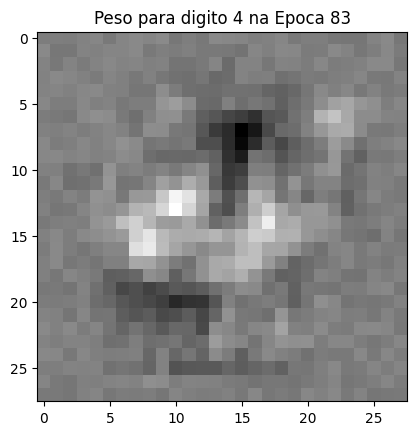

Epoch[84/100], loss: 0.188333, acc: 0.964000


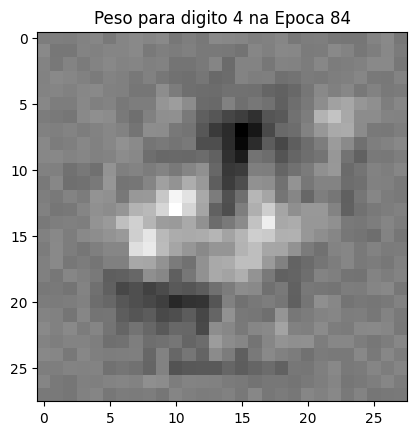

Epoch[85/100], loss: 0.187694, acc: 0.964000


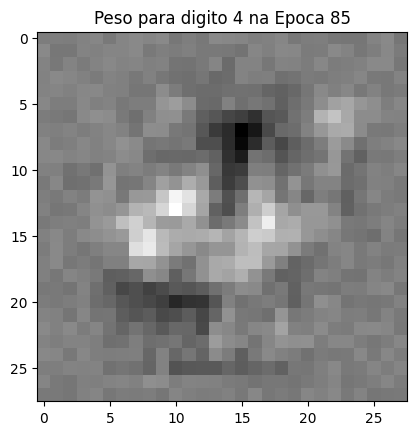

Epoch[86/100], loss: 0.187060, acc: 0.964000


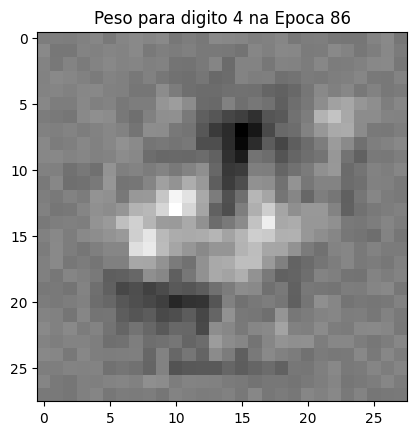

Epoch[87/100], loss: 0.186429, acc: 0.964000


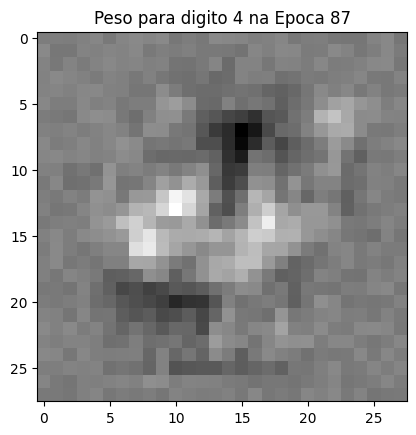

Epoch[88/100], loss: 0.185803, acc: 0.964000


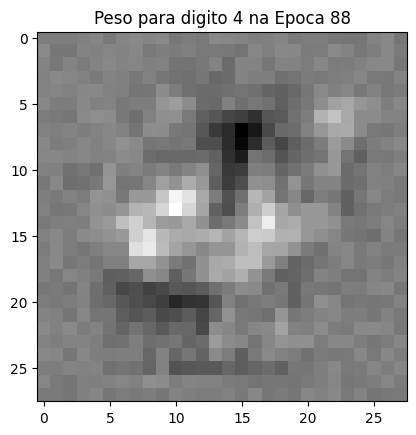

Epoch[89/100], loss: 0.185181, acc: 0.964000


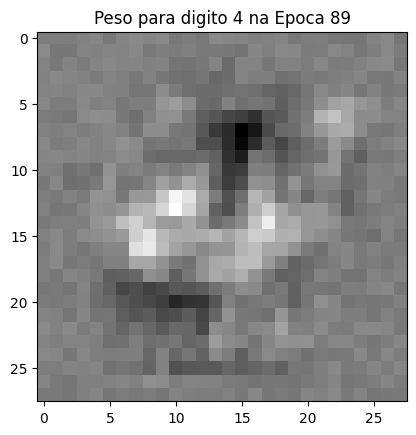

Epoch[90/100], loss: 0.184563, acc: 0.966000


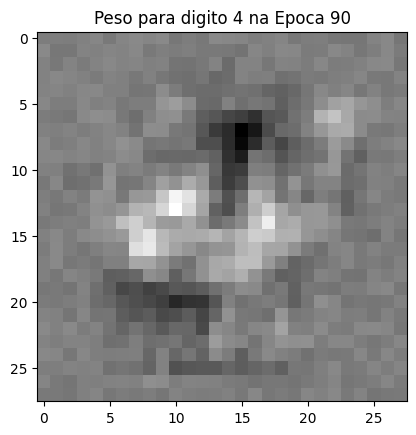

Epoch[91/100], loss: 0.183949, acc: 0.967000


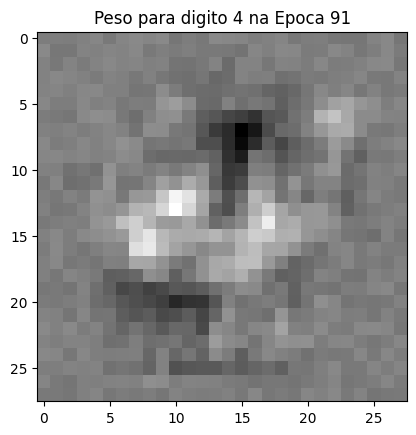

Epoch[92/100], loss: 0.183339, acc: 0.967000


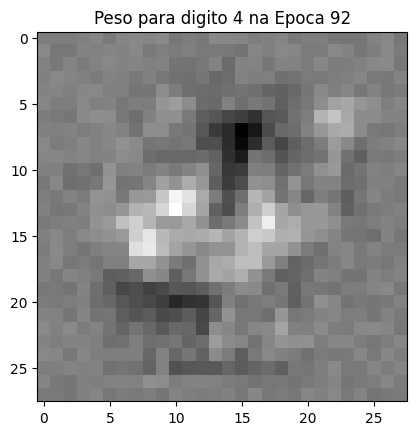

Epoch[93/100], loss: 0.182733, acc: 0.967000


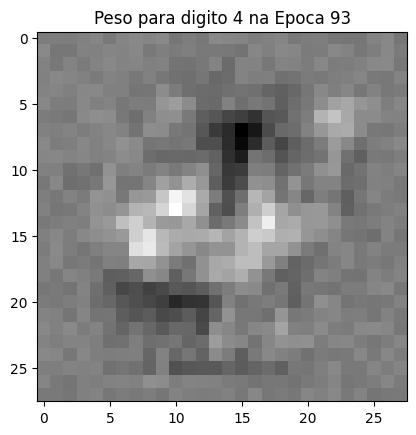

Epoch[94/100], loss: 0.182131, acc: 0.967000


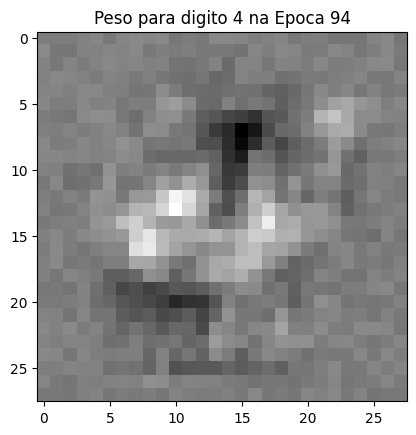

Epoch[95/100], loss: 0.181533, acc: 0.967000


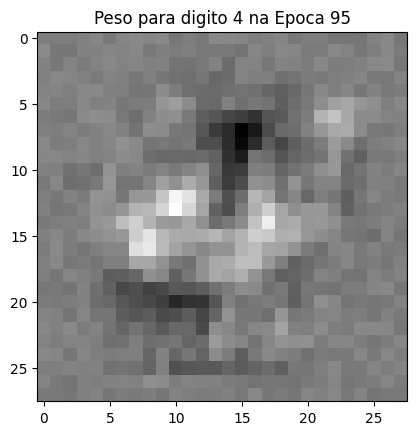

Epoch[96/100], loss: 0.180938, acc: 0.967000


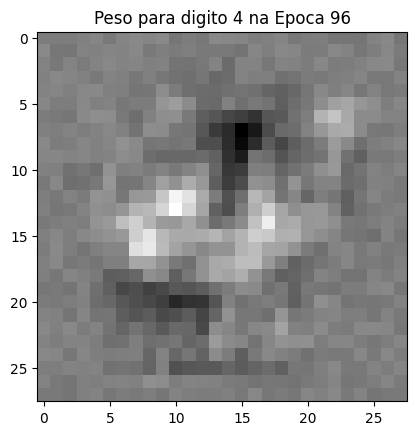

Epoch[97/100], loss: 0.180347, acc: 0.967000


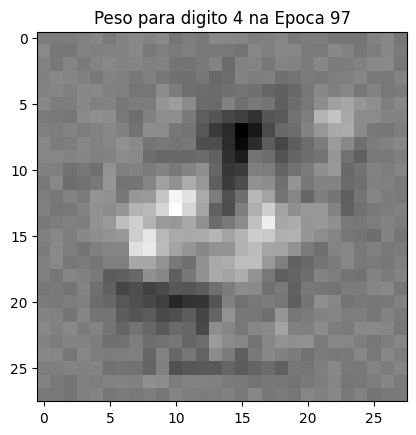

Epoch[98/100], loss: 0.179760, acc: 0.967000


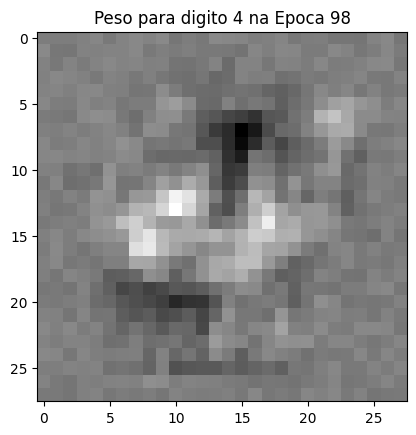

Epoch[99/100], loss: 0.179177, acc: 0.967000


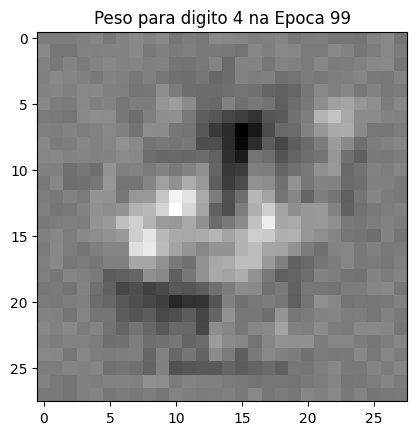

Epoch[100/100], loss: 0.178597, acc: 0.967000


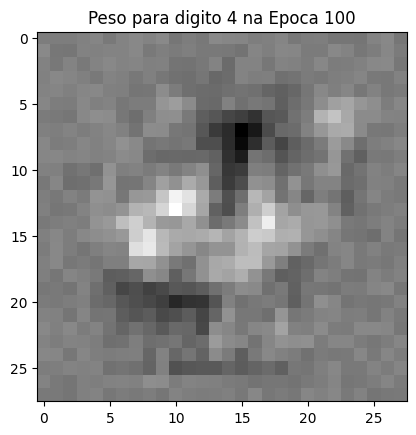

In [44]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'.format(i + 1, epochs, loss.item(), accuracy))


    weights = model.state_dict()['weight']
    plt.imshow(weights[4, :].numpy().reshape((28,28)), cmap='gray')
    plt.title(f'Peso para digito 4 na Epoca {i+1}')
    plt.show()

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

In [45]:
print(f"Shape da matriz de entrada na rede: ({model.in_features},) (considerando um único exemplo sem batch)")
print(f"Shape da saída da rede: ({model.out_features},) (para um único exemplo sem batch)")

total_params = sum(p.numel() for p in model.parameters())
print(f"Número total de parâmetros da rede (incluindo o bias): {total_params}")

Shape da matriz de entrada na rede: (784,) (considerando um único exemplo sem batch)
Shape da saída da rede: (10,) (para um único exemplo sem batch)
Número total de parâmetros da rede (incluindo o bias): 7850


# Aprendizados
